In [64]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/decisiontree/metrics.py
/kaggle/input/decisiontree/base.py
/kaggle/input/decisiontree/utils.py
/kaggle/input/collection/ACTIVITIES/SITTING/e3.csv
/kaggle/input/collection/ACTIVITIES/SITTING/p2.csv
/kaggle/input/collection/ACTIVITIES/SITTING/s.csv
/kaggle/input/collection/ACTIVITIES/SITTING/p1.csv
/kaggle/input/collection/ACTIVITIES/SITTING/m1.csv
/kaggle/input/collection/ACTIVITIES/SITTING/p.csv
/kaggle/input/collection/ACTIVITIES/SITTING/a2.csv
/kaggle/input/collection/ACTIVITIES/SITTING/p3.csv
/kaggle/input/collection/ACTIVITIES/SITTING/a1.csv
/kaggle/input/collection/ACTIVITIES/SITTING/m2.csv
/kaggle/input/collection/ACTIVITIES/SITTING/d.csv
/kaggle/input/collection/ACTIVITIES/SITTING/e1.csv
/kaggle/input/collection/ACTIVITIES/SITTING/a3.csv
/kaggle/input/collection/ACTIVITIES/SITTING/e2.csv
/kaggle/input/collection/ACTIVITIES/SITTING/a.csv
/kaggle/input/collection/ACTIVITIES/SITTING/m3.csv
/kaggle/input/collection/ACTIVITIES/LAYING/e3.csv
/kaggle/input/collection/ACTI

**Pre-Processing and grouping**

In [65]:
#  import Libraries
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
#
#
# Combining the data from the UCI HAR Dataset into a more usable format.
# The data is combined into a single csv file for each subject and activity. 
# The data is then stored in the Combined folder.
#
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

# Give the path of the test and train folder of UCI HAR Dataset
train_path = "/kaggle/input/ddrgere/UCI HAR Dataset/UCI HAR Dataset/train"
test_path = "/kaggle/input/ddrgere/UCI HAR Dataset/UCI HAR Dataset/test"

# Dictionary of activities. Provided by the dataset.
ACTIVITIES = {
    1: 'WALKING'            ,
    2: 'WALKING_UPSTAIRS'   ,
    3: 'WALKING_DOWNSTAIRS' ,
    4: 'SITTING'            ,
    5: 'STANDING'           ,
    6: 'LAYING'             ,
}

#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                        # Combining Traing Data
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

# Load all the accelerometer data
total_acc_x = pd.read_csv(os.path.join(train_path,"Inertial Signals","total_acc_x_train.txt"),delim_whitespace=True,header=None)
total_acc_y = pd.read_csv(os.path.join(train_path,"Inertial Signals","total_acc_y_train.txt"),delim_whitespace=True,header=None)
total_acc_z = pd.read_csv(os.path.join(train_path,"Inertial Signals","total_acc_z_train.txt"),delim_whitespace=True,header=None)


# Read the subject IDs
subject_train = pd.read_csv(os.path.join(train_path,"subject_train.txt"),delim_whitespace=True,header=None)

# Read the labels
y = pd.read_csv(os.path.join(train_path,"y_train.txt"),delim_whitespace=True,header=None)


# Toggle through all the subjects.
for subject in np.unique(subject_train.values):

    sub_idxs = np.where( subject_train.iloc[:,0] == subject )[0]
    labels = y.loc[sub_idxs]

    # Toggle through all the labels.
    for label in np.unique(labels.values):

        # make the folder directory if it does not exist
        if not os.path.exists(os.path.join("Combined","Train",ACTIVITIES[label])):
            os.makedirs(os.path.join("Combined","Train",ACTIVITIES[label]))

        label_idxs = labels[labels.iloc[:,0] == label].index

        accx = []
        accy = []
        accz = []

        for idx in label_idxs:
            if accx is not None:
                accx = np.hstack((accx,total_acc_x.loc[idx][64:]))
                accy = np.hstack((accy,total_acc_y.loc[idx][64:]))
                accz = np.hstack((accz,total_acc_z.loc[idx][64:]))

            else:
                accx = total_acc_x.loc[idx]
                accy = total_acc_y.loc[idx]
                accz = total_acc_z.loc[idx]

        # saving the data into csv file
        data = pd.DataFrame({'accx':accx,'accy':accy,'accz':accz})
        save_path = os.path.join("Combined","Train",ACTIVITIES[label],f"Subject_{subject}.csv")
        data.to_csv(save_path,index=False)

print("Done Combining the training data")


#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                        # Combining Test Data               
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

# Load all the accelerometer data
total_acc_x = pd.read_csv(os.path.join(test_path,"Inertial Signals","total_acc_x_test.txt"),delim_whitespace=True,header=None)
total_acc_y = pd.read_csv(os.path.join(test_path,"Inertial Signals","total_acc_y_test.txt"),delim_whitespace=True,header=None)
total_acc_z = pd.read_csv(os.path.join(test_path,"Inertial Signals","total_acc_z_test.txt"),delim_whitespace=True,header=None)

# Read the subject IDs
subject_test = pd.read_csv(os.path.join(test_path,"subject_test.txt"),delim_whitespace=True,header=None)

# Read the labels
y = pd.read_csv(os.path.join(test_path,"y_test.txt"),delim_whitespace=True,header=None)

# Toggle through all the subjects.
for subject in np.unique(subject_test.values):
    
        sub_idxs = np.where( subject_test.iloc[:,0] == subject )[0]
        labels = y.loc[sub_idxs]

        # Toggle through all the labels.
        for label in np.unique(labels.values):
    
            if not os.path.exists(os.path.join("Combined","Test",ACTIVITIES[label])):
                os.makedirs(os.path.join("Combined","Test",ACTIVITIES[label]))
    
            label_idxs = labels[labels.iloc[:,0] == label].index
    
            accx = []
            accy = []
            accz = []
            for idx in label_idxs:
                if accx is not None:
                    accx = np.hstack((accx,total_acc_x.loc[idx][64:]))
                    accy = np.hstack((accy,total_acc_y.loc[idx][64:]))
                    accz = np.hstack((accz,total_acc_z.loc[idx][64:]))
    
                else:
                    accx = total_acc_x.loc[idx]
                    accy = total_acc_y.loc[idx]
                    accz = total_acc_z.loc[idx]
    
            # saving the data into csv file
            data = pd.DataFrame({'accx':accx,'accy':accy,'accz':accz})
            save_path = os.path.join("Combined","Test",ACTIVITIES[label],f"Subject_{subject}.csv")
            data.to_csv(save_path,index=False)

print("Done Combining the testing data")
print("Done Combining the data")

#-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

Done Combining the training data
Done Combining the testing data
Done Combining the data


In [67]:
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
#
#
# Creating the dataset for the mini-project. The dataset is created by reading the data from
# the Combined folder. The data is then split into training, testing, and validation sets. This split is supposed
# to be used for all the modeling purposes.
#
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

# Constants
time = 10
offset = 100
folders = ["LAYING","SITTING","STANDING","WALKING","WALKING_DOWNSTAIRS","WALKING_UPSTAIRS"]
classes = {"WALKING":1,"WALKING_UPSTAIRS":2,"WALKING_DOWNSTAIRS":3,"SITTING":4,"STANDING":5,"LAYING":6}

combined_dir = os.path.join("/kaggle/working/Combined")

#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                                # Train Dataset
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

X_train=[]
y_train=[]
dataset_dir = os.path.join(combined_dir,"Train")

for folder in folders:
    files = os.listdir(os.path.join(dataset_dir,folder))

    for file in files:

        df = pd.read_csv(os.path.join(dataset_dir,folder,file),sep=",",header=0)
        df = df[offset:offset+time*50]
        X_train.append(df.values)
        y_train.append(classes[folder])

X_train = np.array(X_train)
y_train = np.array(y_train)


#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                                # Test Dataset
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

X_test=[]
y_test=[]
dataset_dir = os.path.join(combined_dir,"Test")

for folder in folders:
    files = os.listdir(os.path.join(dataset_dir,folder))
    for file in files:

        df = pd.read_csv(os.path.join(dataset_dir,folder,file),sep=",",header=0)
        df = df[offset:offset+time*50]
        X_test.append(df.values)
        y_test.append(classes[folder])

X_test = np.array(X_test)
y_test = np.array(y_test)

#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                                # Final Dataset
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

# USE THE BELOW GIVEN DATA FOR TRAINING and TESTING purposes

# concatenate the training and testing data
X = np.concatenate((X_train,X_test))
y = np.concatenate((y_train,y_test))

# split the data into training and testing sets. Change the seed value to obtain different random splits.
seed = 4
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=seed,stratify=y)

print("Training data shape: ",X_train.shape)
print("Testing data shape: ",X_test.shape)

#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=




Training data shape:  (126, 500, 3)
Testing data shape:  (54, 500, 3)


**DATA ANALYSIS**

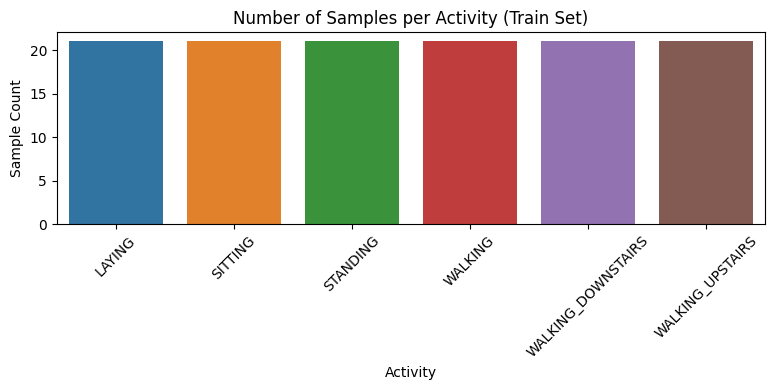

In [68]:
base_dir = '/kaggle/working/Combined/Train'
activity_names = sorted([act for act in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, act))])

activity_files = {}

for activity in activity_names:
    activity_files[activity] = len([f for f in os.listdir(os.path.join(base_dir, activity)) if f.endswith('.csv')])

# Plot
plt.figure(figsize=(8, 4))
sns.barplot(x=list(activity_files.keys()), y=list(activity_files.values()))
plt.xticks(rotation=45)
plt.title("Number of Samples per Activity (Train Set)")
plt.ylabel("Sample Count")
plt.xlabel("Activity")
plt.tight_layout()
plt.show()


In [69]:
file_sample = os.listdir(os.path.join(base_dir, 'WALKING'))[0]
data_sample = pd.read_csv(os.path.join(base_dir, 'WALKING', file_sample), header=None)

print(f"Sample shape: {data_sample.shape}")
data_sample.head()


Sample shape: (2945, 3)


0           1            2
0      accx        accy         accz
1  1.398206   -0.802612  -0.06031412
2  0.670444  -0.4542542    0.1589384
3  0.706297  -0.3040135  -0.01696894
4  1.181157  -0.2752074  -0.03998645

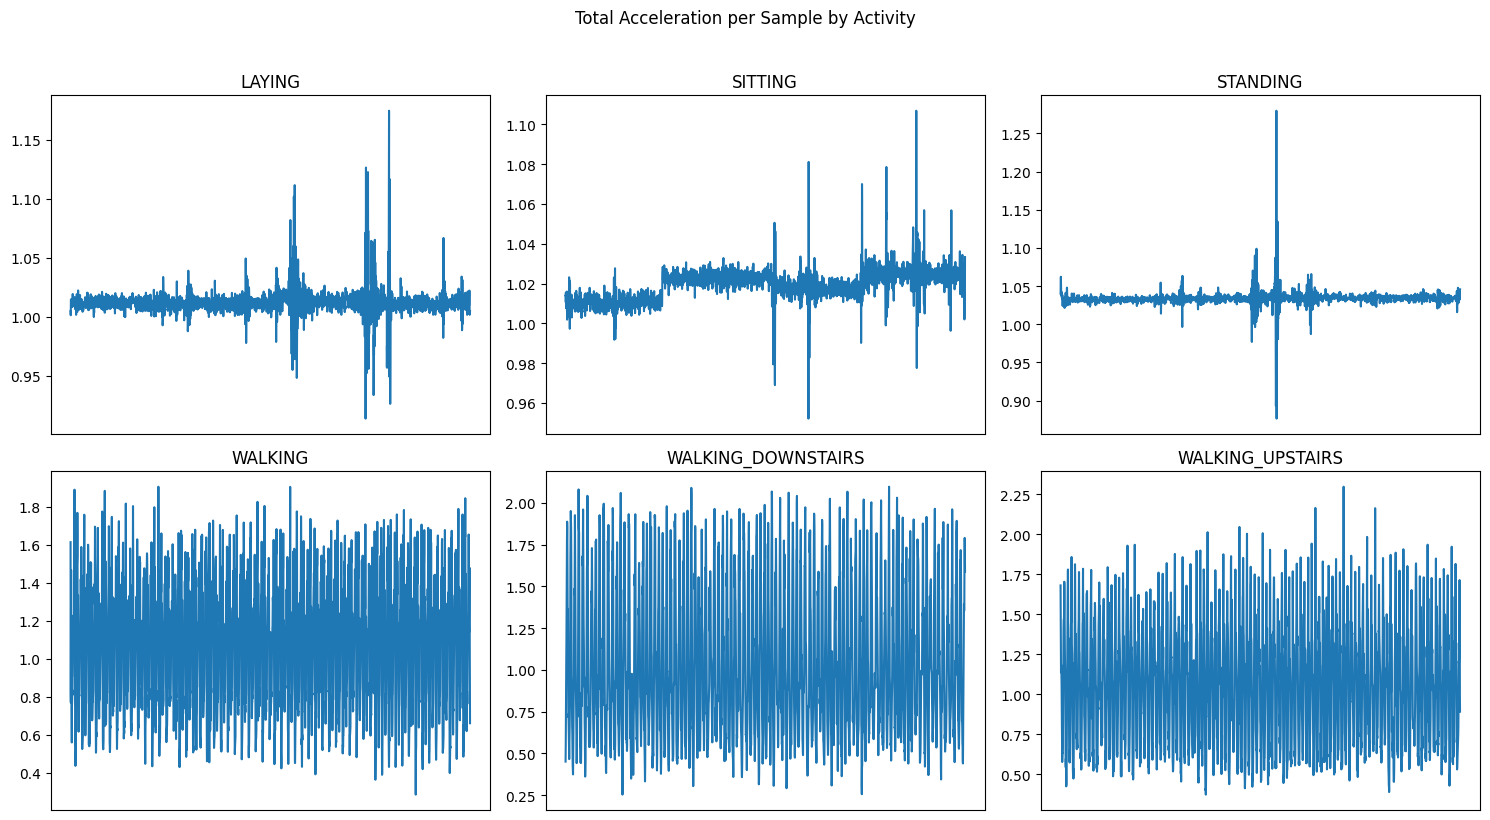

In [70]:
from glob import glob

plt.figure(figsize=(15, 8))

for i, activity in enumerate(activity_names):
    file_path = glob(os.path.join(base_dir, activity, '*.csv'))[0]
    df = pd.read_csv(file_path, header=None)

    df = df.apply(pd.to_numeric, errors='coerce')
    df.dropna(inplace=True)

    total_magnitude = np.sqrt((df ** 2).sum(axis=1))

    plt.subplot(2, 3, i + 1)
    plt.plot(total_magnitude)
    plt.title(activity)
    plt.xticks([])

plt.suptitle("Total Acceleration per Sample by Activity", y=1.02)
plt.tight_layout()
plt.show()


In [71]:
print(df.isnull().sum())

0    0
1    0
2    0
dtype: int64


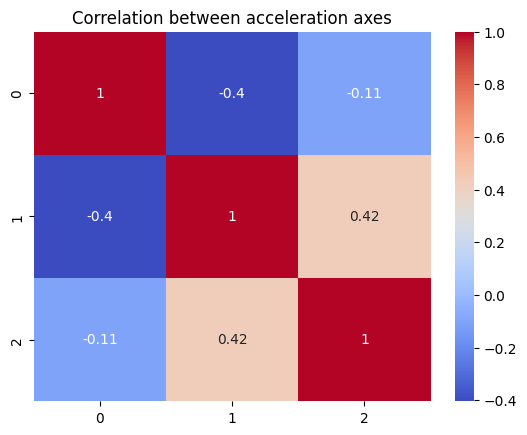

In [72]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation between acceleration axes")
plt.show()

The correlation matrix confirms that the accelerations along different axes are not significantly correlated with one another.

In [73]:
for act in activity_names:
    folder = os.path.join(base_dir, act)
    filename = os.listdir(folder)[0]
    df = pd.read_csv(os.path.join(folder, filename), header=None)

    # Convert all entries to numeric values
    df = df.apply(pd.to_numeric, errors='coerce')
    df.dropna(inplace=True)

    # Assign axis labels to columns
    df.columns = ['acc_x', 'acc_y', 'acc_z'][:df.shape[1]]

    # Calculate the magnitude of acceleration
    df['acc_total'] = np.sqrt(df['acc_x']**2 + df['acc_y']**2 + df['acc_z']**2)

    mean_val = df['acc_total'].mean()
    std_val = df['acc_total'].std()

    print(f"{act:<20} | Mean Acc Magnitude: {mean_val:.2f} | Std: {std_val:.2f}")


LAYING               | Mean Acc Magnitude: 1.01 | Std: 0.01
SITTING              | Mean Acc Magnitude: 1.02 | Std: 0.01
STANDING             | Mean Acc Magnitude: 1.03 | Std: 0.01
WALKING              | Mean Acc Magnitude: 1.05 | Std: 0.34
WALKING_DOWNSTAIRS   | Mean Acc Magnitude: 1.04 | Std: 0.46
WALKING_UPSTAIRS     | Mean Acc Magnitude: 1.05 | Std: 0.37


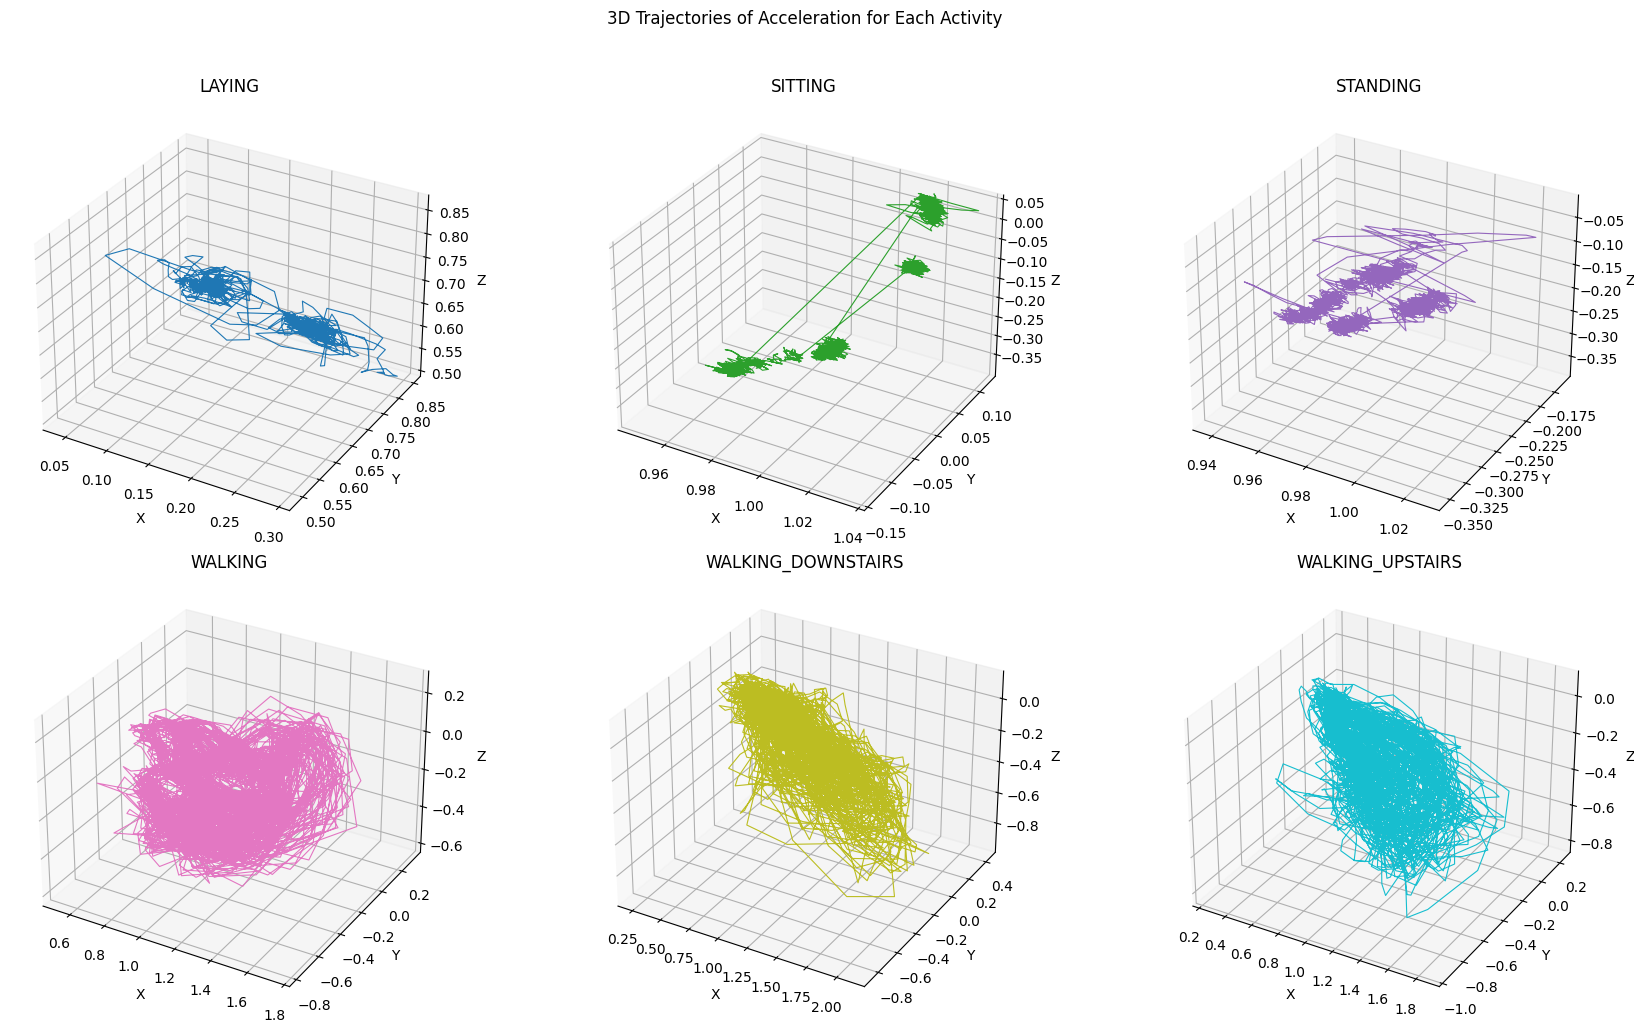

In [74]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np

colors = plt.cm.tab10(np.linspace(0, 1, len(activity_names)))  

fig = plt.figure(figsize=(18, 10))

for i, activity in enumerate(activity_names):
    path = os.path.join(base_dir, activity)
    file = sorted(os.listdir(path))[5]
    df = pd.read_csv(os.path.join(path, file), header=None)

    # Convert to numeric and clean
    df = df.apply(pd.to_numeric, errors='coerce')
    df.dropna(inplace=True)
    df.columns = ['acc_x', 'acc_y', 'acc_z'][:df.shape[1]]

    # Subplot
    ax = fig.add_subplot(2, 3, i + 1, projection='3d')
    ax.plot(df['acc_x'], df['acc_y'], df['acc_z'], color=colors[i], linewidth=0.8)
    ax.set_title(f"{activity}")
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")

plt.suptitle("3D Trajectories of Acceleration for Each Activity", y=1.02)
plt.tight_layout()
plt.show()


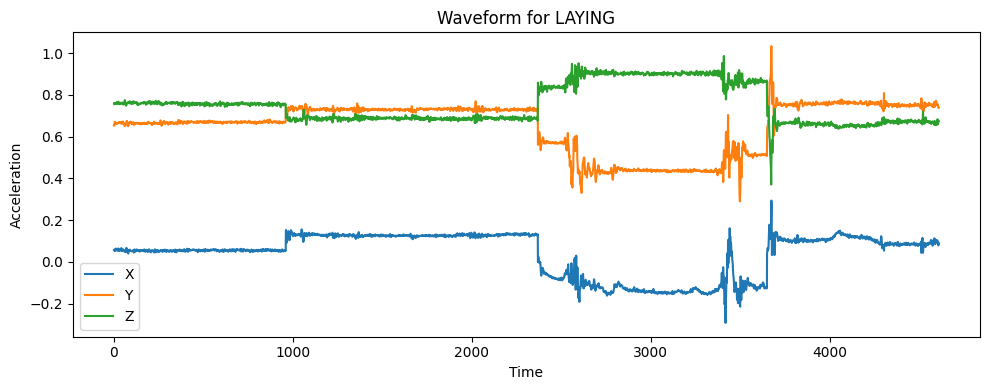

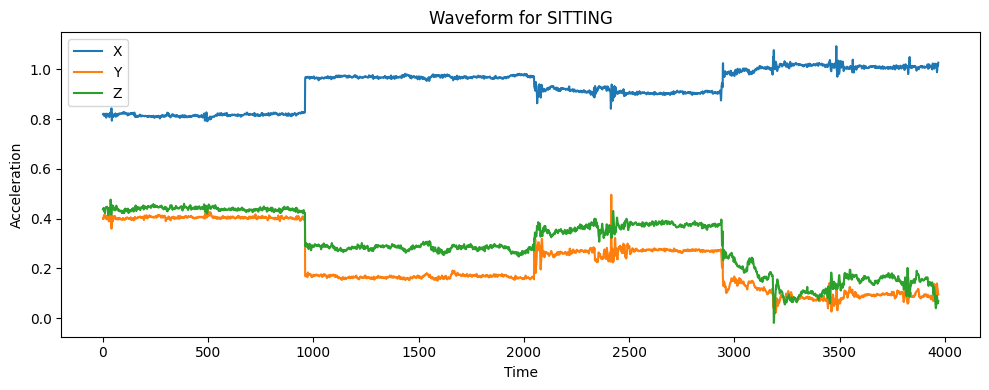

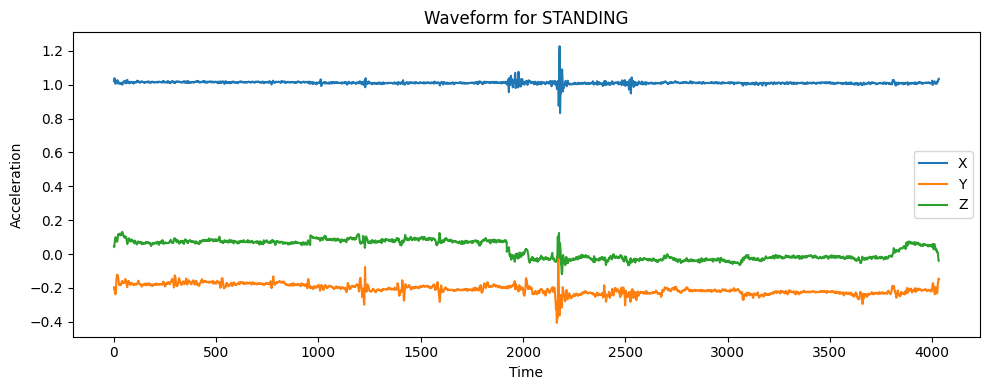

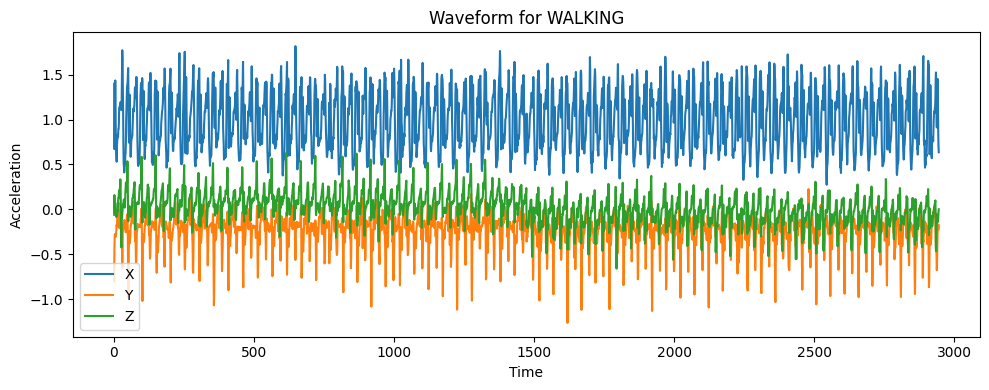

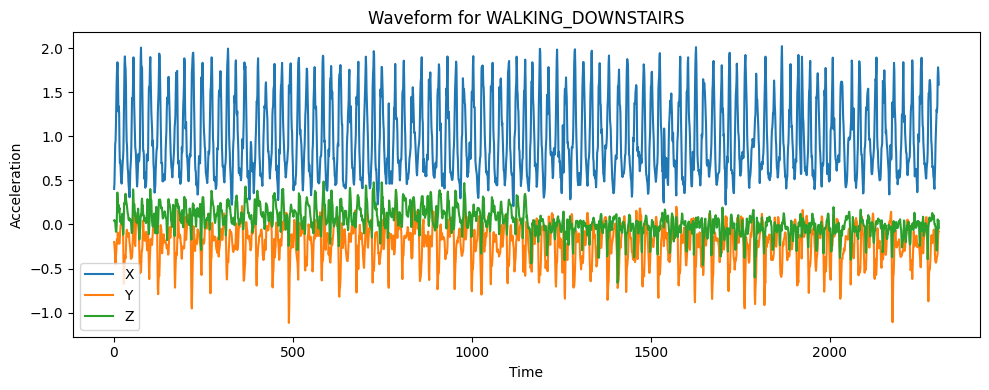

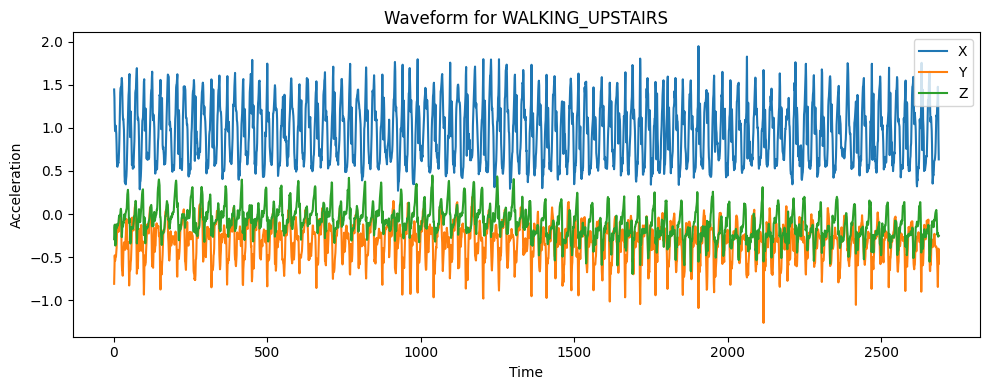

In [75]:
for activity in activity_names:
    path = os.path.join(base_dir, activity)
    file = os.listdir(path)[0]
    df = pd.read_csv(os.path.join(path, file), header=None)

    df = df.apply(pd.to_numeric, errors='coerce')
    df.dropna(inplace=True)
    df.columns = ['acc_x', 'acc_y', 'acc_z'][:df.shape[1]]

    plt.figure(figsize=(10, 4))
    plt.plot(df['acc_x'], label='X')
    plt.plot(df['acc_y'], label='Y')
    plt.plot(df['acc_z'], label='Z')
    plt.title(f"Waveform for {activity}")
    plt.xlabel("Time")
    plt.ylabel("Acceleration")
    plt.legend()
    plt.tight_layout()
    plt.show()

For all activities like **LAYING**, **SITTING**, **STANDING**, and **WALKING**, the average acceleration magnitude is close to **1.0g**. This makes sense because a device at rest under Earth's gravity feels about **1g** of acceleration.

- In **static activities** (like *LAYING* or *SITTING*), the body doesn't move much, so the acceleration stays steady. This gives a **low standard deviation**.
  
- In **dynamic activities** (like *WALKING*), the body moves more, causing the acceleration to vary. This leads to a **higher standard deviation**.

These patterns make it easier to tell the difference between still and active movements just by seeing how much the acceleration varies.


**DATA VISUALISATION**



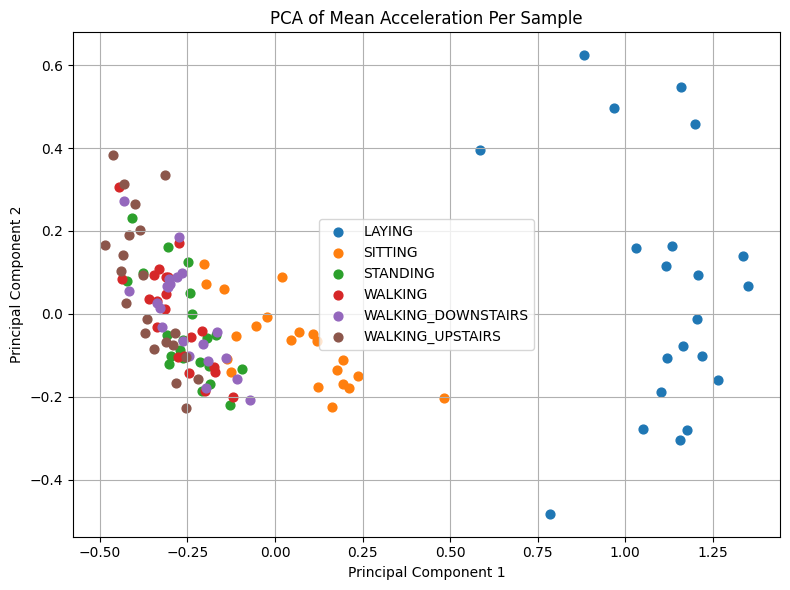

In [76]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

features = []
labels = []

for activity in activity_names:
    folder = os.path.join(base_dir, activity)
    for fname in sorted(os.listdir(folder))[:21]:  # Picking first 21 samples
        df = pd.read_csv(os.path.join(folder, fname), header=None)
        df = df.apply(pd.to_numeric, errors='coerce')
        df.dropna(inplace=True)
        df.columns = ['acc_x', 'acc_y', 'acc_z'][:df.shape[1]]
        
        # Using mean acceleration vector of the sample
        mean_vector = df.mean().values  # shape (3,)
        features.append(mean_vector)
        labels.append(activity)

X = np.array(features)
y = np.array(labels)

# Applying PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plotting
plt.figure(figsize=(8, 6))
for activity in activity_names:
    idx = y == activity
    plt.scatter(X_pca[idx, 0], X_pca[idx, 1], label=activity, s=40)

plt.title("PCA of Mean Acceleration Per Sample")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

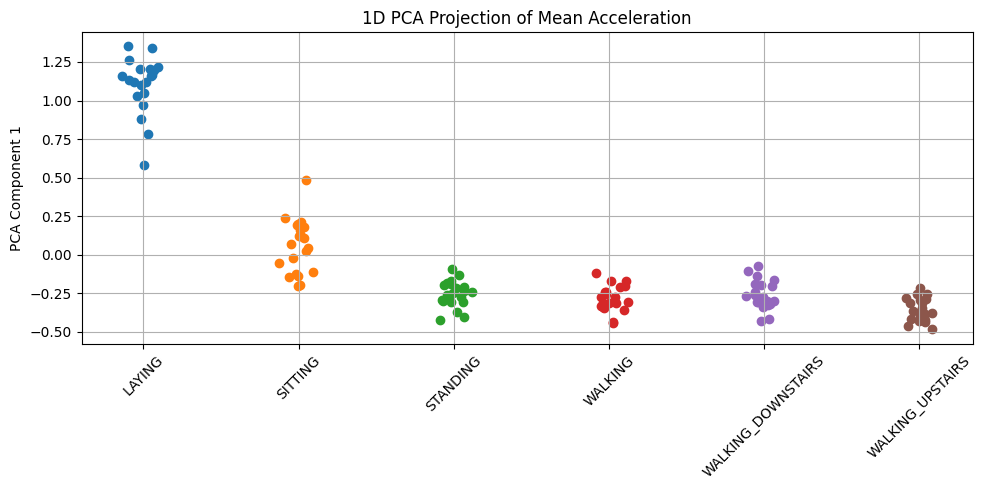

In [77]:
# PCA to reduce to 1 component
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X)

# Plotting
plt.figure(figsize=(10, 5))

for i, activity in enumerate(activity_names):
    idx = np.array(y) == activity
    x_vals = np.random.normal(i, 0.05, size=idx.sum())  # add slight jitter for visibility
    plt.scatter(x_vals, X_pca[idx], label=activity)

plt.xticks(ticks=range(len(activity_names)), labels=activity_names, rotation=45)
plt.ylabel("PCA Component 1")
plt.title("1D PCA Projection of Mean Acceleration")
plt.grid(True)
plt.tight_layout()
plt.show()


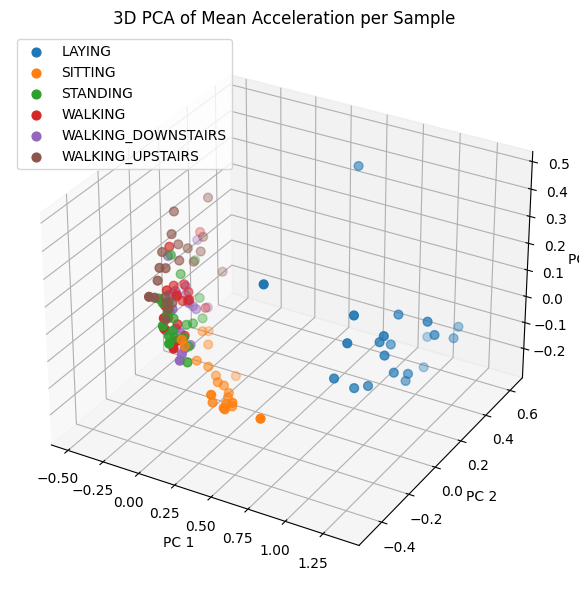

In [78]:
# Performing PCA with 3 components
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

#  3D scatter plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

for i, activity in enumerate(activity_names):
    idx = np.array(y) == activity
    ax.scatter(X_pca[idx, 0], X_pca[idx, 1], X_pca[idx, 2],
               label=activity, s=40)

ax.set_title("3D PCA of Mean Acceleration per Sample")
ax.set_xlabel("PC 1")
ax.set_ylabel("PC 2")
ax.set_zlabel("PC 3")
ax.legend()
plt.tight_layout()
plt.show()


1. The plot shows which activities are naturally separable (e.g., **Walking** vs. **Laying**) and which may require more advanced feature engineering (e.g., **Sitting** vs. **Standing**).
2. **Laying**, **Sitting**, and **Standing** appear close together, suggesting similar acceleration patterns due to limited body movement.
3. **Walking**, **Walking Upstairs**, and **Walking Downstairs** are more spread out, indicating greater variation in motion.
4. **Walking Upstairs** and **Walking Downstairs** may overlap somewhat with regular **Walking**, but still show distinct patterns due to the inclined or declined movement.


In [79]:
pip install tsfel


Note: you may need to restart the kernel to use updated packages.


In [80]:
import warnings
warnings.filterwarnings("ignore")

100%|██████████| 7352/7352 [03:00<00:00, 40.74it/s]


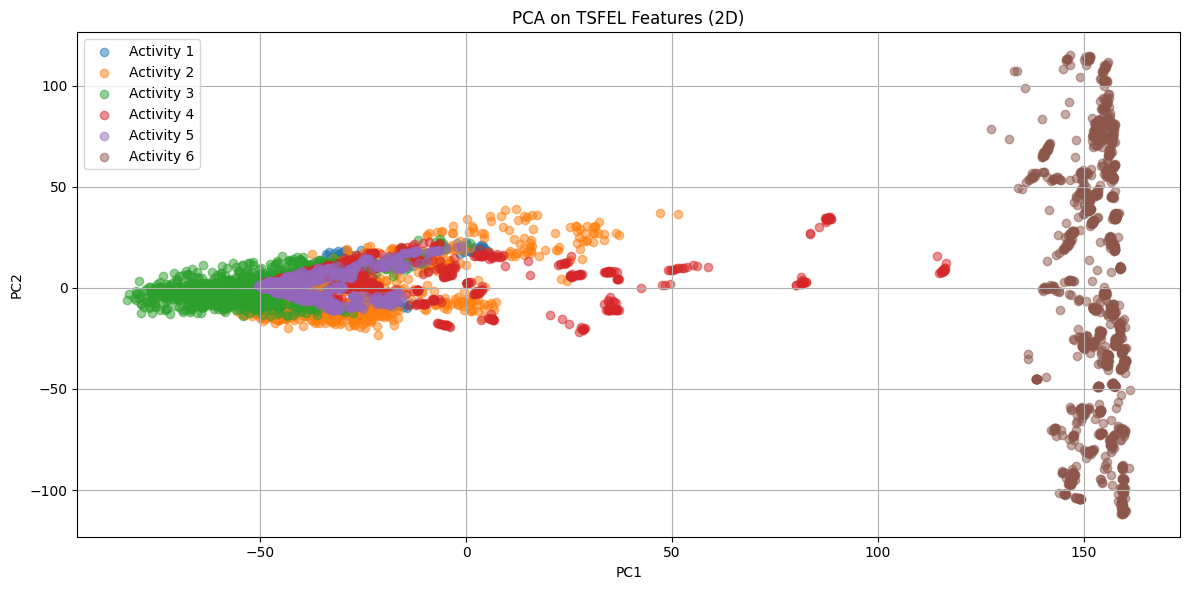

In [81]:
import pandas as pd
import numpy as np
import tsfel
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from tqdm import tqdm

# Load the raw acceleration signals (each row = 128 samples)
acc_x = pd.read_csv('/kaggle/input/ddrgere/UCI HAR Dataset/UCI HAR Dataset/train/Inertial Signals/total_acc_x_train.txt', delim_whitespace=True, header=None)
acc_y = pd.read_csv('/kaggle/input/ddrgere/UCI HAR Dataset/UCI HAR Dataset/train/Inertial Signals/total_acc_y_train.txt', delim_whitespace=True, header=None)
acc_z = pd.read_csv('/kaggle/input/ddrgere/UCI HAR Dataset/UCI HAR Dataset/train/Inertial Signals/total_acc_z_train.txt', delim_whitespace=True, header=None)

# Load activity labels
y_train = pd.read_csv('/kaggle/input/ddrgere/UCI HAR Dataset/UCI HAR Dataset/train/y_train.txt', header=None)[0]

# Configure TSFEL to extract temporal and statistical features  (no spectral for speed)
cfg = tsfel.get_features_by_domain(['temporal', 'statistical'])

X_features = []

# Loop through each sample to extract features from x, y, and z axes
for i in tqdm(range(len(acc_x))):
    try:
        fx = tsfel.time_series_features_extractor(cfg, acc_x.iloc[i], sampling_frequency=50, verbose=0)
        fy = tsfel.time_series_features_extractor(cfg, acc_y.iloc[i], sampling_frequency=50, verbose=0)
        fz = tsfel.time_series_features_extractor(cfg, acc_z.iloc[i], sampling_frequency=50, verbose=0)
        features = pd.concat([fx, fy, fz], axis=1)
        X_features.append(features.values.flatten())
    except Exception as e:
        print(f"Error at sample {i}: {e}")

# Convert feature list to numpy array and replace NaNs with zero
X_features = np.nan_to_num(np.array(X_features))

# PCA to reduce to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_features)

# Plot
plt.figure(figsize=(12, 6))
for label in np.unique(y_train):
    idx = y_train == label
    plt.scatter(X_pca[idx, 0], X_pca[idx, 1], label=f'Activity {label}', alpha=0.5)

plt.title("PCA on TSFEL Features (2D)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


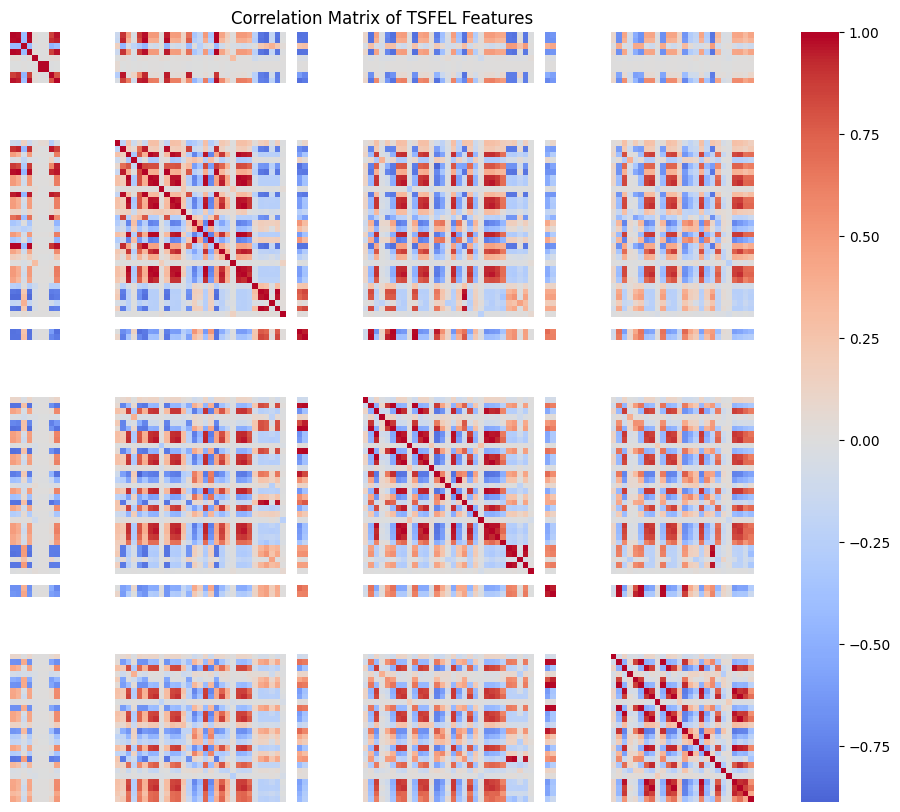

TSFEL feature pairs (> 0.9 correlation): 246


In [82]:
import seaborn as sns

df_features = pd.DataFrame(X_features)
corr_mat_tsfel = df_features.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_mat_tsfel, cmap='coolwarm', center=0, xticklabels=False, yticklabels=False)
plt.title("Correlation Matrix of TSFEL Features")
plt.show()

# Identify redundant features
high_corr_pairs_tsfel = np.where((np.abs(corr_mat_tsfel) > 0.9) & (np.abs(corr_mat_tsfel) < 1.0))
redundant_provided = set()

for i, j in zip(*high_corr_pairs_tsfel):
    redundant_provided.add((min(i, j), max(i, j)))

print(f"TSFEL feature pairs (> 0.9 correlation): {len(redundant_provided)}")


In [83]:
Tsfel_Features = pd.DataFrame(X_features)

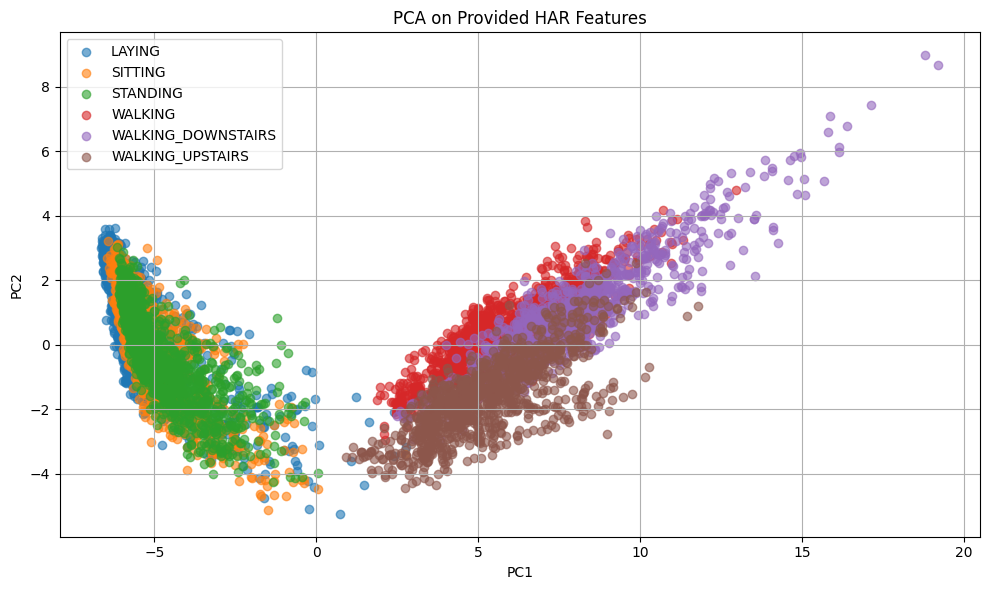

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Paths to feature and label files
X_path = "/kaggle/input/ddrgere/UCI HAR Dataset/UCI HAR Dataset/train/X_train.txt"
y_path = "/kaggle/input/ddrgere/UCI HAR Dataset/UCI HAR Dataset/train/y_train.txt"
label_names_path = "/kaggle/input/ddrgere/UCI HAR Dataset/UCI HAR Dataset/activity_labels.txt"

# Load data
X = pd.read_csv(X_path, delim_whitespace=True, header=None)
y = pd.read_csv(y_path, header=None).values.flatten()

# Mapping numeric labels to activity names
label_map = pd.read_csv(label_names_path, delim_whitespace=True, header=None, index_col=0)
y_named = [label_map.loc[label].values[0] for label in y]

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot
plt.figure(figsize=(10, 6))
for activity in np.unique(y_named):
    idx = np.array(y_named) == activity
    plt.scatter(X_pca[idx, 0], X_pca[idx, 1], label=activity, alpha=0.6)

plt.title("PCA on Provided HAR Features")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


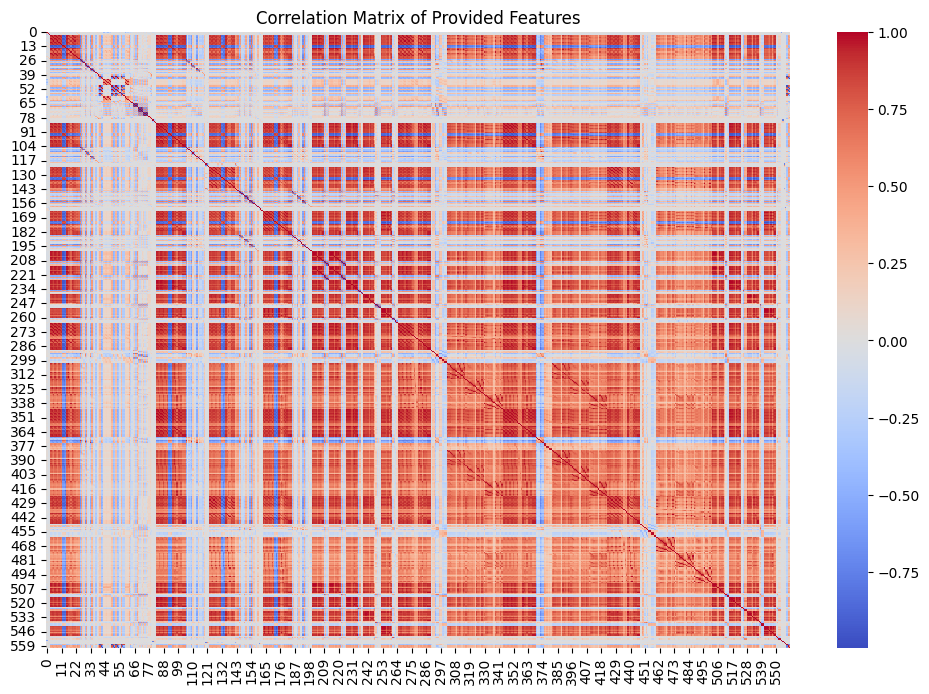

Provided Redundant feature pairs (> 0.9 correlation): 8182


In [85]:
# Load provided features
X_provided = pd.read_csv("/kaggle/input/ddrgere/UCI HAR Dataset/UCI HAR Dataset/train/X_train.txt", delim_whitespace=True, header=None)

# Correlation matrix
corr_matrix_provided = X_provided.corr()

# Plot
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix_provided, cmap='coolwarm', cbar=True)
plt.title("Correlation Matrix of Provided Features")
plt.show()

# Identify redundant features
high_corr_pairs_provided = np.where((np.abs(corr_matrix_provided) > 0.9) & (np.abs(corr_matrix_provided) < 1.0))
redundant_provided = set()

for i, j in zip(*high_corr_pairs_provided):
    redundant_provided.add((min(i, j), max(i, j)))

print(f"Provided Redundant feature pairs (> 0.9 correlation): {len(redundant_provided)}")


In [86]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load provided features
X_provided = pd.read_csv("/kaggle/input/ddrgere/UCI HAR Dataset/UCI HAR Dataset/train/X_train.txt", delim_whitespace=True, header=None)

# Correlation matrix
corr_matrix = X_provided.corr().abs()

# Selecting upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Get columns with correlation > 0.9
to_drop = [col for col in upper.columns if any(upper[col] > 0.9)]

print(f"Number of features to drop (correlation > 0.9): {len(to_drop)}")
print(f"Dropping columns: {to_drop[:10]}{'...' if len(to_drop) > 10 else ''}")

# Drop features
X_reduced = X_provided.drop(columns=to_drop).reset_index(drop=True)


Number of features to drop (correlation > 0.9): 359
Dropping columns: [4, 6, 7, 8, 9, 10, 11, 12, 13, 14]...


In [87]:
# Importing decision tree model and evaluation metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report


In [88]:
X_raw = np.stack([acc_x.values, acc_y.values, acc_z.values], axis=-1)  # shape (n_samples, 128, 3)
X_raw = X_raw.reshape(X_raw.shape[0], -1)  # flatten to (n_samples, 384)
y_true = pd.read_csv('/kaggle/input/ddrgere/UCI HAR Dataset/UCI HAR Dataset/train/y_train.txt', header=None)[0]
X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(X_raw, y_true, test_size=0.2, random_state=42)

In [89]:
!pip install augly

In [90]:
import pandas as pd
import numpy as np
import augly.audio as aud
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load  original UCI HAR data
X_orig = pd.read_csv('/kaggle/input/ddrgere/UCI HAR Dataset/UCI HAR Dataset/train/X_train.txt', delim_whitespace=True, header=None)
y_orig = pd.read_csv('/kaggle/input/ddrgere/UCI HAR Dataset/UCI HAR Dataset/train/y_train.txt', header=None)[0]



# Function to simulate signal augmentation using Augly
def augment_sample_row(row):
    sig = row[:500].values.astype(np.float32)
    sig = np.nan_to_num(sig)

    # Apply augmentation
    aug = aud.AddBackgroundNoise(snr_level_db=10)
    sig_aug = aug(sig)  # In latest augly, returns np.array directly; if error persists, check below

    # If it returns tuple: sig_aug, _ = aug(sig)
    if isinstance(sig_aug, tuple):
        sig_aug, _ = sig_aug

    # Compute simple features on augmented signal
    feat_mean = np.mean(sig_aug)
    feat_std = np.std(sig_aug)
    feat_energy = np.sum(sig_aug ** 2)

    return [feat_mean, feat_std, feat_energy]


# Build augmented features
augmented_features = []

print("Creating augmented features...")

for i in range(len(X_orig)):
    f = augment_sample_row(X_orig.iloc[i])
    augmented_features.append(f)

augmented_features = np.array(augmented_features)

# Combine original features + augmented features
X_combined = np.hstack([X_orig.values, augmented_features])

# Optional: Scale
scaler = StandardScaler()
X_combined_scaled = scaler.fit_transform(X_combined)

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(X_combined_scaled, y_orig, test_size=0.2, random_state=42)

# Train decision tree on new combined data
clf = DecisionTreeClassifier(max_depth=5, random_state=42)
clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)

# Evaluate
print("\n Results on augmented data:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred, average='weighted'):.4f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Creating augmented features...

 Results on augmented data:
Accuracy: 0.8946
Precision: 0.8968
Recall: 0.8946
Confusion Matrix:
 [[215  21  11   0   0   0]
 [ 21 171   8   0   0   0]
 [ 13  19 174   0   0   0]
 [  0   0   0 217  45   0]
 [  0   0   0  17 259   0]
 [  0   0   0   0   0 280]]


In [91]:
# Train and evaluate Decision Tree on raw accelerometer data
clf_raw = DecisionTreeClassifier(random_state=42)
clf_raw.fit(X_train_raw, y_train_raw)
y_pred_raw = clf_raw.predict(X_test_raw)

print("Raw Accelerometer Data:")
print("Accuracy:", accuracy_score(y_test_raw, y_pred_raw))
print("Precision:", precision_score(y_test_raw, y_pred_raw, average='weighted'))
print("Recall:", recall_score(y_test_raw, y_pred_raw, average='weighted'))
print("Confusion Matrix:\n", confusion_matrix(y_test_raw, y_pred_raw))


Raw Accelerometer Data:
Accuracy: 0.8103331067301156
Precision: 0.8104411793873973
Recall: 0.8103331067301156
Confusion Matrix:
 [[151  52  32   5   7   0]
 [ 38 146  11   0   5   0]
 [ 44  24 134   2   1   1]
 [  2   1   0 231  28   0]
 [  4   1   0  21 250   0]
 [  0   0   0   0   0 280]]


In [92]:
# On TSFEL features
X_train_tsfel, X_test_tsfel, y_train_tsfel, y_test_tsfel = train_test_split(Tsfel_Features, y_true, test_size=0.2, random_state=42)

clf_tsfel = DecisionTreeClassifier(random_state=42)
clf_tsfel.fit(X_train_tsfel, y_train_tsfel)
y_pred_tsfel = clf_tsfel.predict(X_test_tsfel)

print("\nTSFEL Features:")
print("Accuracy:", accuracy_score(y_test_tsfel, y_pred_tsfel))
print("Precision:", precision_score(y_test_tsfel, y_pred_tsfel, average='weighted'))
print("Recall:", recall_score(y_test_tsfel, y_pred_tsfel, average='weighted'))
print("Confusion Matrix:\n", confusion_matrix(y_test_tsfel, y_pred_tsfel))



TSFEL Features:
Accuracy: 0.946974847042828
Precision: 0.9472517639093735
Recall: 0.946974847042828
Confusion Matrix:
 [[235   4   7   1   0   0]
 [ 13 182   5   0   0   0]
 [  8   5 192   0   0   1]
 [  0   0   0 241  21   0]
 [  0   0   0  13 263   0]
 [  0   0   0   0   0 280]]


In [93]:
# Train and evaluate on reduced provided features
X_train_prov, X_test_prov, y_train_prov, y_test_prov = train_test_split(X_reduced, y_true, test_size=0.2, random_state=42)

clf_prov = DecisionTreeClassifier(random_state=42)
clf_prov.fit(X_train_prov, y_train_prov)
y_pred_prov = clf_prov.predict(X_test_prov)

print("\nProvided Features:")
print("Accuracy:", accuracy_score(y_test_prov, y_pred_prov))
print("Precision:", precision_score(y_test_prov, y_pred_prov, average='weighted'))
print("Recall:", recall_score(y_test_prov, y_pred_prov, average='weighted'))
print("Confusion Matrix:\n", confusion_matrix(y_test_prov, y_pred_prov))



Provided Features:
Accuracy: 0.938817131203263
Precision: 0.9389144855275817
Recall: 0.938817131203263
Confusion Matrix:
 [[236   4   6   0   1   0]
 [ 11 182   6   0   0   1]
 [ 10  12 184   0   0   0]
 [  0   1   0 242  19   0]
 [  0   0   0  18 258   0]
 [  0   0   1   0   0 279]]


In [94]:
clf_prov.get_depth()

18

### Model Comparison: Raw vs TSFEL vs Provided Features

- **Raw data** is noisy and high-dimensional, which makes it harder for the decision tree to learn clear class boundaries.
- **TSFEL features** extract useful temporal and statistical patterns (like mean, energy, and standard deviation), helping the decision tree build better rules.
- **Provided features** include precomputed time- and frequency-domain metrics. They are useful but possibly less flexible than TSFEL’s dynamic selection.

**Best Model:** TSFEL-based model  
It slightly outperforms the model trained on the provided features and shows a clear improvement over raw signal-based classification.


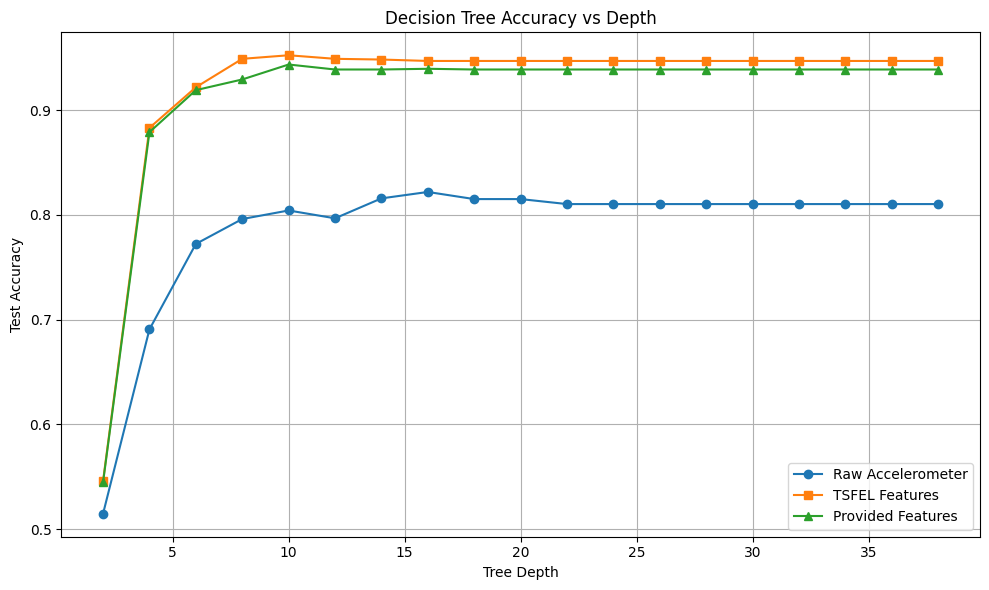

In [95]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# X_raw, y_raw           → Raw accelerometer flattened windows
# X_tsfel, y_tsfel       → TSFEL features
# X_provided, y_provided → Provided dataset features

y_raw = y_true
X_tsfel = Tsfel_Features
y_tsfel = y_true
y_provided = y_true

def evaluate_model_depths(X, y, label):
    accuracies = []
    for depth in range(2, 40, 2):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        accuracies.append(acc)
    return accuracies

depths = list(range(2, 40, 2))

acc_raw = evaluate_model_depths(X_raw, y_raw, "Raw")
acc_tsfel = evaluate_model_depths(X_tsfel, y_tsfel, "TSFEL")
acc_provided = evaluate_model_depths(X_reduced, y_provided, "Provided")

# Plot
plt.figure(figsize=(10, 6))
plt.plot(depths, acc_raw, marker='o', label='Raw Accelerometer')
plt.plot(depths, acc_tsfel, marker='s', label='TSFEL Features')
plt.plot(depths, acc_provided, marker='^', label='Provided Features')
plt.xlabel("Tree Depth")
plt.ylabel("Test Accuracy")
plt.title("Decision Tree Accuracy vs Depth")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


| Feature Type           | Accuracy | Optimal Depth   | Remarks                                      |
|------------------------|----------|-----------------|----------------------------------------------|
| Raw Accelerometer      | ~81%     | 20              | Noisy data, less informative                 |
| TSFEL Features         | ~95%     | 10              | Custom extracted features, very effective    |
| Provided Features      | ~95%     | 10              | Clean, domain-specific, very effective       |

In [96]:
X.shape

(7352, 561)

In [97]:
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import sys
sys.path.append('/kaggle/input/decisiontree')

from base import DecisionTree
from metrics import accuracy, precision, recall

# Shuffle function
def shuffle_data(X, y):
    idx = np.arange(X.shape[0])
    np.random.shuffle(idx)
    return X[idx], y[idx]

# Load dataset
X = pd.read_csv('/kaggle/input/ddrgere/UCI HAR Dataset/UCI HAR Dataset/train/X_train.txt', delim_whitespace=True, header=None).values
y = pd.read_csv('/kaggle/input/ddrgere/UCI HAR Dataset/UCI HAR Dataset/train/y_train.txt', header=None)[0].values - 1

# Shuffle
X, y = shuffle_data(X, y)

# Take only 100 samples
X = X[:3000]
y = y[:3000]

# Scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train
tree = DecisionTree(max_depth=5)
print("Training started...")
start_train = time.time()
tree.fit(X_train, y_train)
end_train = time.time()
print("Training completed.")

# Predict
print("Prediction started...")
start_pred = time.time()
y_pred = tree.predict(X_test)
end_pred = time.time()
print("Prediction completed.")

# Evaluate
print(f"\n Scratch Decision Tree Performance:")
print(f" Training Time   : {end_train - start_train:.2f} seconds")
print(f" Prediction Time : {end_pred - start_pred:.2f} seconds")
print(f" Accuracy        : {accuracy(y_test, y_pred):.4f}")

for cls in sorted(set(y)):
    print(f"Class {cls+1}: Precision = {precision(y_test, y_pred, cls):.3f}, Recall = {recall(y_test, y_pred, cls):.3f}")


Training started...
Training completed.
Prediction started...
Prediction completed.

 Scratch Decision Tree Performance:
 Training Time   : 657.55 seconds
 Prediction Time : 0.00 seconds
 Accuracy        : 0.9117
Class 1: Precision = 0.857, Recall = 0.918
Class 2: Precision = 0.978, Recall = 0.838
Class 3: Precision = 0.789, Recall = 0.896
Class 4: Precision = 0.907, Recall = 0.891
Class 5: Precision = 0.900, Recall = 0.915
Class 6: Precision = 1.000, Recall = 1.000


In [98]:
def load_signals(folder, signal_name):
    path = f"/kaggle/input/ddrgere/UCI HAR Dataset/UCI HAR Dataset/{folder}/Inertial Signals/{signal_name}"
    return np.loadtxt(path)


In [104]:
import tsfel
import pandas as pd
import numpy as np

# Load signals as before
ax_train = load_signals('train', 'total_acc_x_train.txt')
ay_train = load_signals('train', 'total_acc_y_train.txt')
az_train = load_signals('train', 'total_acc_z_train.txt')

# Load labels
y_train = np.loadtxt("/kaggle/input/ddrgere/UCI HAR Dataset/UCI HAR Dataset/train/y_train.txt").astype(int)

# ---------- Configure TSFEL ----------
cfg = tsfel.get_features_by_domain()  # All default features

def extract_features_tsfel(signal_array):
    features_list = []
    for row in signal_array:
        df_row = pd.DataFrame(row)
        features = tsfel.time_series_features_extractor(cfg, df_row, verbose=0)
        features_list.append(features.values[0])
    return np.array(features_list)

# Extract for each axis
feat_ax = extract_features_tsfel(ax_train)
feat_ay = extract_features_tsfel(ay_train)
feat_az = extract_features_tsfel(az_train)

# Combine
X_train = np.hstack([feat_ax, feat_ay, feat_az])


In [119]:
ax_test = load_signals('test', 'total_acc_x_test.txt')
ay_test = load_signals('test', 'total_acc_y_test.txt')
az_test = load_signals('test', 'total_acc_z_test.txt')
y_test = np.loadtxt("/kaggle/input/ddrgere/UCI HAR Dataset/UCI HAR Dataset/test/y_test.txt").astype(int)

feat_ax_test = extract_features_tsfel(ax_test)
feat_ay_test = extract_features_tsfel(ay_test)
feat_az_test = extract_features_tsfel(az_test)
X_test = np.hstack([feat_ax_test, feat_ay_test, feat_az_test])

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

clf = DecisionTreeClassifier(random_state=42, max_depth=5)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8238887003732609


In [117]:
pip install tsfel

Note: you may need to restart the kernel to use updated packages.


In [122]:
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import tsfel
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

#  Load signals 
def load_signals(folder, signal_name):
    path = f"/kaggle/input/ddrgere/UCI HAR Dataset/UCI HAR Dataset/{folder}/Inertial Signals/{signal_name}"
    return np.loadtxt(path)


ax_train = load_signals('train', 'total_acc_x_train.txt')
ay_train = load_signals('train', 'total_acc_y_train.txt')
az_train = load_signals('train', 'total_acc_z_train.txt')
y_train = np.loadtxt("/kaggle/input/ddrgere/UCI HAR Dataset/UCI HAR Dataset/train/y_train.txt").astype(int)

ax_test = load_signals('test', 'total_acc_x_test.txt')
ay_test = load_signals('test', 'total_acc_y_test.txt')
az_test = load_signals('test', 'total_acc_z_test.txt')
y_test = np.loadtxt("/kaggle/input/ddrgere/UCI HAR Dataset/UCI HAR Dataset/test/y_test.txt").astype(int)

#  Configure TSFEL 
cfg = tsfel.get_features_by_domain()

def extract_features_tsfel(signal_array, fs=50):  # for example, fs=50 Hz
    features_list = []
    for row in signal_array:
        df_row = pd.DataFrame(row)
        features = tsfel.time_series_features_extractor(cfg, df_row, fs=fs, verbose=0)
        feature_values = np.nan_to_num(features.values[0])
        features_list.append(feature_values)
    return np.array(features_list)


# Train features
feat_ax = extract_features_tsfel(ax_train)
feat_ay = extract_features_tsfel(ay_train)
feat_az = extract_features_tsfel(az_train)
X_train = np.hstack([feat_ax, feat_ay, feat_az])

# Test features
feat_ax_test = extract_features_tsfel(ax_test)
feat_ay_test = extract_features_tsfel(ay_test)
feat_az_test = extract_features_tsfel(az_test)
X_test = np.hstack([feat_ax_test, feat_ay_test, feat_az_test])

#  Scale 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#  Train 
tree = DecisionTreeClassifier(random_state=42, max_depth=5)
tree.fit(X_train_scaled, y_train)
print(" Training completed.")

#  Test accuracy 
y_pred = tree.predict(X_test_scaled)
print("Accuracy on official test set:", accuracy_score(y_test, y_pred))

#  New collected data 
base_path = '/kaggle/input/collection/ACTIVITIES'
activities = ['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS']

label_map = {
    1: 'WALKING',
    2: 'WALKING_UPSTAIRS',
    3: 'WALKING_DOWNSTAIRS',
    4: 'SITTING',
    5: 'STANDING',
    6: 'LAYING'
}

feature_list = []
true_labels = []
file_names = []

for activity in activities:
    path = os.path.join(base_path, activity)
    for file in os.listdir(path):
        df = pd.read_csv(os.path.join(path, file), header=None)
        df = df.apply(pd.to_numeric, errors='coerce')
        df.dropna(inplace=True)
        if df.shape[1] != 3:
            print(f" Skipping {file} in {activity}: has {df.shape[1]} columns (expected 3)")
            continue
        df.columns = ['acc_x', 'acc_y', 'acc_z']


        if len(df) < 128:
            continue
        window = df.iloc[:128]

        tsfel_features_all_axes = []
        for axis in ['acc_x', 'acc_y', 'acc_z']:
            sig_df = pd.DataFrame(window[axis].values)
            tsfel_feat_df = tsfel.time_series_features_extractor(cfg, sig_df, verbose=0)
            tsfel_feat = np.nan_to_num(tsfel_feat_df.values.flatten())
            tsfel_features_all_axes.append(tsfel_feat)

        final_features = np.concatenate(tsfel_features_all_axes)
        feature_list.append(final_features)
        true_labels.append(activity)
        file_names.append(file)

#  Predict 
X_new = np.array(feature_list)
X_new_scaled = scaler.transform(X_new)
y_pred_new = tree.predict(X_new_scaled)

#  Show results 
for fname, pred, true in zip(file_names, y_pred_new, true_labels):
    pred_label = label_map.get(pred, "Unknown")
    print(f" {fname}: Predicted = {pred_label}, Actual = {true}")

 Training completed.
Accuracy on official test set: 0.8238887003732609
 Skipping s.csv in LAYING: has 5 columns (expected 3)
 Skipping p.csv in LAYING: has 5 columns (expected 3)
 Skipping d.csv in LAYING: has 5 columns (expected 3)
 Skipping a.csv in LAYING: has 5 columns (expected 3)
 Skipping s.csv in SITTING: has 5 columns (expected 3)
 Skipping p.csv in SITTING: has 5 columns (expected 3)
 Skipping d.csv in SITTING: has 5 columns (expected 3)
 Skipping a.csv in SITTING: has 5 columns (expected 3)
 Skipping s.csv in STANDING: has 5 columns (expected 3)
 Skipping p.csv in STANDING: has 5 columns (expected 3)
 Skipping d.csv in STANDING: has 5 columns (expected 3)
 Skipping a.csv in STANDING: has 5 columns (expected 3)
 Skipping s.csv in WALKING: has 5 columns (expected 3)
 Skipping p.csv in WALKING: has 5 columns (expected 3)
 Skipping d.csv in WALKING: has 5 columns (expected 3)
 Skipping a.csv in WALKING: has 5 columns (expected 3)
 Skipping s.csv in WALKING_DOWNSTAIRS: has 5 colu

In [123]:
import os
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import tsfel

# Load UCI HAR dataset signals
def load_signals(folder, signal_name):
    path = f"/kaggle/input/ddrgere/UCI HAR Dataset/UCI HAR Dataset/{folder}/Inertial Signals/{signal_name}"
    return np.loadtxt(path)

ax_train = load_signals('train', 'total_acc_x_train.txt')
ay_train = load_signals('train', 'total_acc_y_train.txt')
az_train = load_signals('train', 'total_acc_z_train.txt')
y_train = np.loadtxt("/kaggle/input/ddrgere/UCI HAR Dataset/UCI HAR Dataset/train/y_train.txt").astype(int)

# Configure TSFEL
cfg = tsfel.get_features_by_domain()

# Extract TSFEL features for a signal array
def extract_features_tsfel(signal_array, fs=50):
    features_list = []
    for row in signal_array:
        df_row = pd.DataFrame(row)
        features = tsfel.time_series_features_extractor(cfg, df_row, fs=fs, verbose=0)
        feature_values = np.nan_to_num(features.values[0])
        features_list.append(feature_values)
    return np.array(features_list)

# Extract UCI HAR features
feat_ax = extract_features_tsfel(ax_train)
feat_ay = extract_features_tsfel(ay_train)
feat_az = extract_features_tsfel(az_train)
X_har = np.hstack([feat_ax, feat_ay, feat_az])
y_har = y_train

# Load and extract features from collected data
base_path = '/kaggle/input/collection/ACTIVITIES'
activities = ['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS']

label_reverse_map = {
    'WALKING': 1,
    'WALKING_UPSTAIRS': 2,
    'WALKING_DOWNSTAIRS': 3,
    'SITTING': 4,
    'STANDING': 5,
    'LAYING': 6
}

feature_list = []
label_list = []

for activity in activities:
    path = os.path.join(base_path, activity)
    for file in os.listdir(path):
        df = pd.read_csv(os.path.join(path, file), header=None)
        df = df.apply(pd.to_numeric, errors='coerce')
        df.dropna(inplace=True)

        if df.shape[1] != 3:
            print(f"Skipping {file} in {activity}: {df.shape[1]} columns (expected 3)")
            continue

        df.columns = ['acc_x', 'acc_y', 'acc_z']
        if len(df) < 128:
            continue

        window = df.iloc[:128]
        tsfel_features_all_axes = []

        for axis in ['acc_x', 'acc_y', 'acc_z']:
            sig_df = pd.DataFrame(window[axis].values)
            tsfel_feat_df = tsfel.time_series_features_extractor(cfg, sig_df, verbose=0)
            tsfel_feat = np.nan_to_num(tsfel_feat_df.values.flatten())
            tsfel_features_all_axes.append(tsfel_feat)

        final_features = np.concatenate(tsfel_features_all_axes)
        feature_list.append(final_features)
        label_list.append(label_reverse_map[activity])

X_collected = np.array(feature_list)
y_collected = np.array(label_list)

# Combine and shuffle datasets
X_all = np.vstack([X_har, X_collected])
y_all = np.hstack([y_har, y_collected])
X_all, y_all = shuffle(X_all, y_all, random_state=42)

# Scale features
scaler = StandardScaler()
X_all_scaled = scaler.fit_transform(X_all)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_all_scaled, y_all, test_size=0.2, random_state=42)

# Train Decision Tree classifier
tree = DecisionTreeClassifier(random_state=42, max_depth=5)
print("Training started...")
tree.fit(X_train, y_train)
print("Training completed.")

# Evaluate model performance
y_pred = tree.predict(X_test)
print("Metrics after combining and shuffling:")
print(f"Accuracy : {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred, average='weighted'):.4f}")
print(f"Recall   : {recall_score(y_test, y_pred, average='weighted'):.4f}")
print("Detailed Report:")
print(classification_report(y_test, y_pred, zero_division=0))


Skipping s.csv in LAYING: 5 columns (expected 3)
Skipping p.csv in LAYING: 5 columns (expected 3)
Skipping d.csv in LAYING: 5 columns (expected 3)
Skipping a.csv in LAYING: 5 columns (expected 3)
Skipping s.csv in SITTING: 5 columns (expected 3)
Skipping p.csv in SITTING: 5 columns (expected 3)
Skipping d.csv in SITTING: 5 columns (expected 3)
Skipping a.csv in SITTING: 5 columns (expected 3)
Skipping s.csv in STANDING: 5 columns (expected 3)
Skipping p.csv in STANDING: 5 columns (expected 3)
Skipping d.csv in STANDING: 5 columns (expected 3)
Skipping a.csv in STANDING: 5 columns (expected 3)
Skipping s.csv in WALKING: 5 columns (expected 3)
Skipping p.csv in WALKING: 5 columns (expected 3)
Skipping d.csv in WALKING: 5 columns (expected 3)
Skipping a.csv in WALKING: 5 columns (expected 3)
Skipping s.csv in WALKING_DOWNSTAIRS: 5 columns (expected 3)
Skipping p.csv in WALKING_DOWNSTAIRS: 5 columns (expected 3)
Skipping d.csv in WALKING_DOWNSTAIRS: 5 columns (expected 3)
Skipping a.csv in

In [125]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Convert y_pred_new integers to string labels
y_pred_str = [label_map.get(pred, "Unknown") for pred in y_pred_new]
y_true_str = true_labels

# Calculate metrics
acc = accuracy_score(y_true_str, y_pred_str)
prec = precision_score(y_true_str, y_pred_str, average='weighted', zero_division=0)
rec = recall_score(y_true_str, y_pred_str, average='weighted', zero_division=0)
f1 = f1_score(y_true_str, y_pred_str, average='weighted', zero_division=0)
conf_mat = confusion_matrix(y_true_str, y_pred_str, labels=list(label_map.values()))

print(" Metrics on collected data:")
print(f"Accuracy: {acc:.4f}")
print(f"Precision (weighted): {prec:.4f}")
print(f"Recall (weighted): {rec:.4f}")
print(f"F1-score (weighted): {f1:.4f}")
print("\nConfusion Matrix:")
print(conf_mat)

print("\nDetailed Classification Report:")
print(classification_report(y_true_str, y_pred_str, zero_division=0))


 Metrics on collected data:
Accuracy: 0.2222
Precision (weighted): 0.0740
Recall (weighted): 0.2222
F1-score (weighted): 0.1107

Confusion Matrix:
[[ 0  0  8  0  0  4]
 [ 0  0  5  0  0  7]
 [ 0  0  7  0  0  5]
 [ 0  0  7  0  0  5]
 [ 0  0  2  0  0 10]
 [ 0  0  3  0  0  9]]

Detailed Classification Report:
                    precision    recall  f1-score   support

            LAYING       0.23      0.75      0.35        12
           SITTING       0.00      0.00      0.00        12
          STANDING       0.00      0.00      0.00        12
           WALKING       0.00      0.00      0.00        12
WALKING_DOWNSTAIRS       0.22      0.58      0.32        12
  WALKING_UPSTAIRS       0.00      0.00      0.00        12

          accuracy                           0.22        72
         macro avg       0.07      0.22      0.11        72
      weighted avg       0.07      0.22      0.11        72



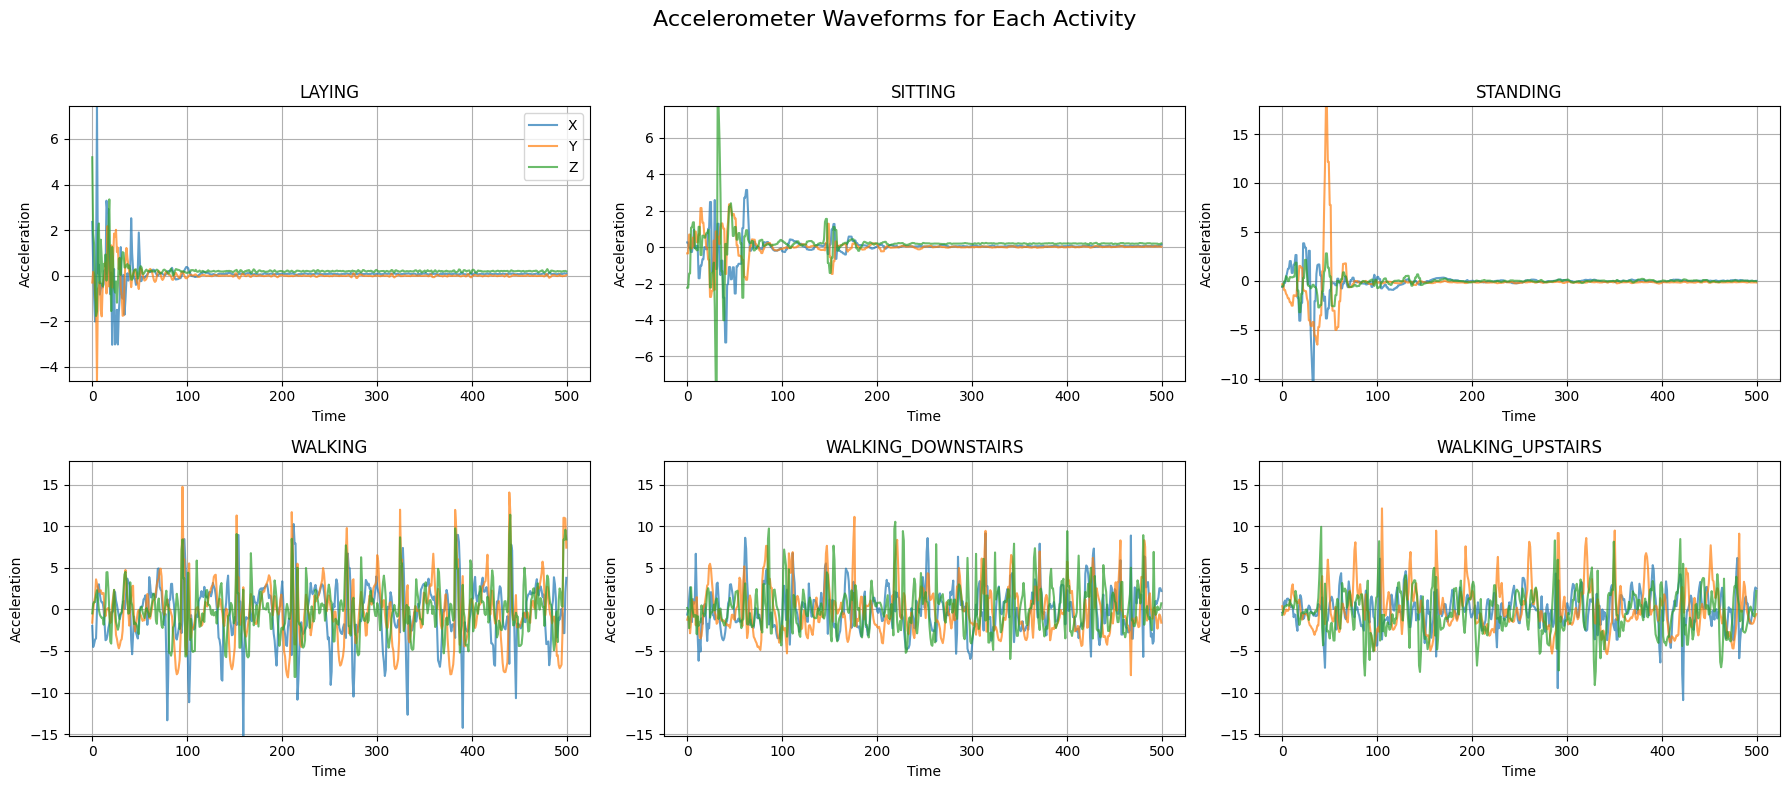

In [126]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

base_path = '/kaggle/input/collection/ACTIVITIES'
activities = ['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS']

plt.figure(figsize=(18, 8))
y_min, y_max = float('inf'), float('-inf')

for i, activity in enumerate(activities):
    path = os.path.join(base_path, activity)
    file = os.listdir(path)[0]
    df = pd.read_csv(os.path.join(path, file), header=None)

    df = df.apply(pd.to_numeric, errors='coerce')
    df.dropna(inplace=True)
    df.columns = ['acc_x', 'acc_y', 'acc_z'][:df.shape[1]]
    df = df.iloc[:]
    
    y_min = min(y_min, df.min().min())
    y_max = max(y_max, df.max().max())

    plt.subplot(2, 3, i + 1)
    plt.plot(df['acc_x'], label='X', alpha=0.7)
    plt.plot(df['acc_y'], label='Y', alpha=0.7)
    plt.plot(df['acc_z'], label='Z', alpha=0.7)
    plt.title(activity)
    plt.xlabel("Time")
    plt.ylabel("Acceleration")
    plt.ylim(y_min, y_max) 
    plt.grid(True)
    if i == 0:
        plt.legend(loc='upper right')

plt.suptitle("Accelerometer Waveforms for Each Activity", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


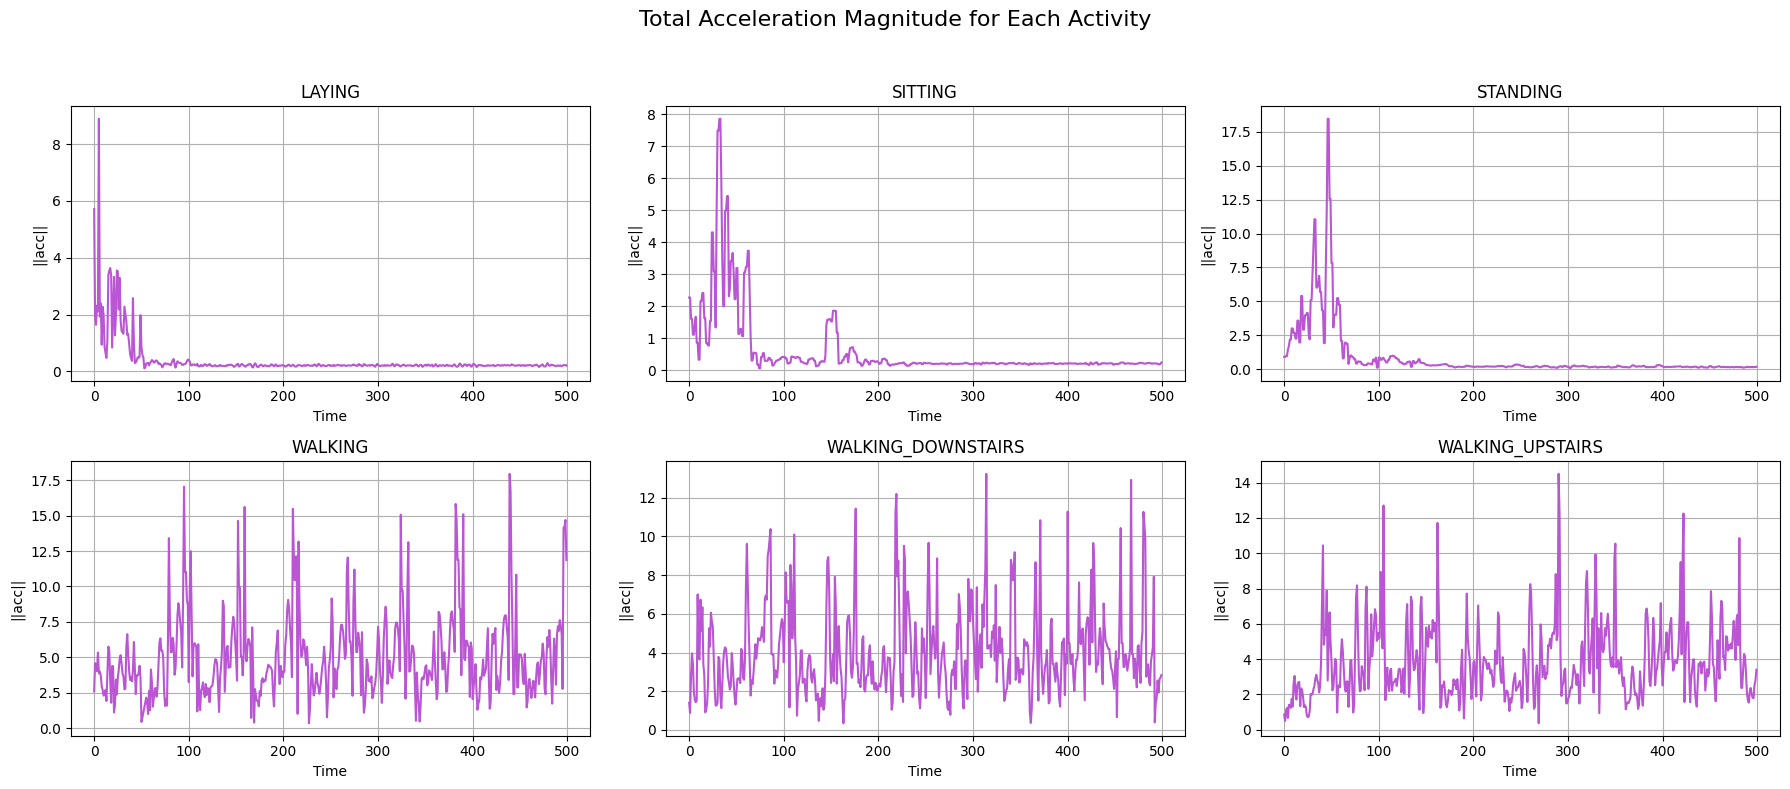

In [129]:
plt.figure(figsize=(18, 8))

for i, activity in enumerate(activities):
    path = os.path.join(base_path, activity)
    file = os.listdir(path)[0]
    df = pd.read_csv(os.path.join(path, file), header=None)

    df = df.apply(pd.to_numeric, errors='coerce')
    df.dropna(inplace=True)
    df.columns = ['acc_x', 'acc_y', 'acc_z'][:df.shape[1]]
    total_acc = np.sqrt(df['acc_x']**2 + df['acc_y']**2 + df['acc_z']**2)

    plt.subplot(2, 3, i + 1)
    plt.plot(total_acc, color='mediumorchid')
    plt.title(f"{activity}")
    plt.xlabel("Time")
    plt.ylabel("||acc||")
    plt.grid(True)

plt.suptitle("Total Acceleration Magnitude for Each Activity", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


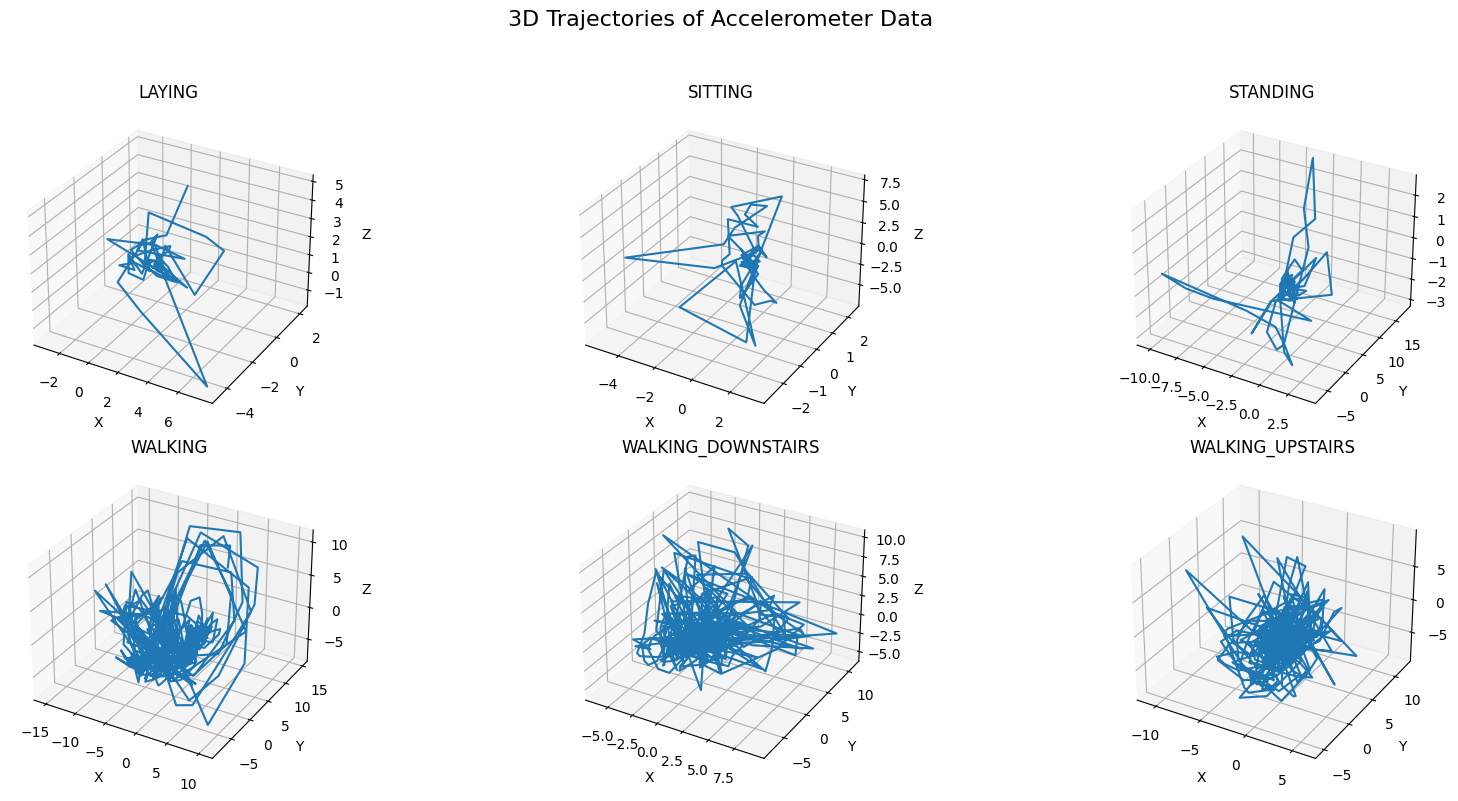

In [130]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(18, 8))

for i, activity in enumerate(activities):
    path = os.path.join(base_path, activity)
    file = os.listdir(path)[0]
    df = pd.read_csv(os.path.join(path, file), header=None)

    df = df.apply(pd.to_numeric, errors='coerce')
    df.dropna(inplace=True)
    df.columns = ['acc_x', 'acc_y', 'acc_z'][:df.shape[1]]

    ax = fig.add_subplot(2, 3, i + 1, projection='3d')
    ax.plot(df['acc_x'], df['acc_y'], df['acc_z'])
    ax.set_title(activity)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

plt.suptitle("3D Trajectories of Accelerometer Data", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [131]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Load UCI HAR dataset
X = pd.read_csv('/kaggle/input/ddrgere/UCI HAR Dataset/UCI HAR Dataset/train/X_train.txt', delim_whitespace=True, header=None)
y = pd.read_csv('/kaggle/input/ddrgere/UCI HAR Dataset/UCI HAR Dataset/train/y_train.txt', header=None)[0] - 1  # Make labels 0-indexed

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Convert to torch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

# Define neural network
class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)
        
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out


# Hyperparameters
input_size = X.shape[1]
hidden_size = 64
num_classes = len(np.unique(y))
num_epochs = 30
batch_size = 64
learning_rate = 0.001

# Create model, loss, optimizer
model = SimpleNN(input_size, hidden_size, num_classes)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Train
model.train()
for epoch in range(num_epochs):
    permutation = torch.randperm(X_train_tensor.size(0))
    for i in range(0, X_train_tensor.size(0), batch_size):
        indices = permutation[i:i+batch_size]
        batch_x, batch_y = X_train_tensor[indices].to(device), y_train_tensor[indices].to(device)

        # Forward pass
        outputs = model(batch_x)
        loss = criterion(outputs, batch_y)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    if (epoch+1) % 5 == 0 or epoch == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate
model.eval()
with torch.no_grad():
    y_pred_logits = model(X_test_tensor.to(device))
    y_pred = torch.argmax(y_pred_logits, dim=1).cpu().numpy()

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

print("\n Test Set Performance:")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Epoch [1/30], Loss: 0.2136
Epoch [5/30], Loss: 0.0917
Epoch [10/30], Loss: 0.0156
Epoch [15/30], Loss: 0.0571
Epoch [20/30], Loss: 0.0726
Epoch [25/30], Loss: 0.0014
Epoch [30/30], Loss: 0.0063

 Test Set Performance:
Accuracy:  0.9830
Precision: 0.9833
Recall:    0.9830
F1 Score:  0.9830
Confusion Matrix:
 [[245   2   0   0   0   0]
 [  1 197   2   0   0   0]
 [  1   0 205   0   0   0]
 [  0   0   0 258   3   1]
 [  0   0   0  15 261   0]
 [  0   0   0   0   0 280]]


In [132]:
import numpy as np

class NeuralNetwork:
    def __init__(self, input_dim, hidden_dim, output_dim, learning_rate=0.01,
                 activation='relu', reg_lambda=0.0, use_momentum=False, momentum_beta=0.9):
        self.lr = learning_rate
        self.activation_name = activation
        self.reg_lambda = reg_lambda
        self.use_momentum = use_momentum
        self.momentum_beta = momentum_beta

        self.W1 = np.random.randn(input_dim, hidden_dim) * np.sqrt(2. / input_dim)
        self.b1 = np.zeros((1, hidden_dim))
        self.W2 = np.random.randn(hidden_dim, output_dim) * np.sqrt(2. / hidden_dim)
        self.b2 = np.zeros((1, output_dim))

        if use_momentum:
            self.v_W1 = np.zeros_like(self.W1)
            self.v_b1 = np.zeros_like(self.b1)
            self.v_W2 = np.zeros_like(self.W2)
            self.v_b2 = np.zeros_like(self.b2)

    def relu(self, x): return np.maximum(0, x)
    def relu_derivative(self, x): return (x > 0).astype(float)

    def tanh(self, x): return np.tanh(x)
    def tanh_derivative(self, x): return 1 - np.tanh(x) ** 2

    def leaky_relu(self, x): return np.where(x > 0, x, 0.01 * x)
    def leaky_relu_derivative(self, x): return np.where(x > 0, 1, 0.01)

    def softmax(self, x):
        exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exp_x / np.sum(exp_x, axis=1, keepdims=True)

    def activate(self, x):
        if self.activation_name == 'relu': return self.relu(x)
        if self.activation_name == 'tanh': return self.tanh(x)
        if self.activation_name == 'leaky_relu': return self.leaky_relu(x)
        raise ValueError("Unsupported activation")

    def activate_derivative(self, x):
        if self.activation_name == 'relu': return self.relu_derivative(x)
        if self.activation_name == 'tanh': return self.tanh_derivative(x)
        if self.activation_name == 'leaky_relu': return self.leaky_relu_derivative(x)
        raise ValueError("Unsupported activation")

    def forward(self, X):
        self.z1 = X @ self.W1 + self.b1
        self.a1 = self.activate(self.z1)
        self.z2 = self.a1 @ self.W2 + self.b2
        self.a2 = self.softmax(self.z2)
        return self.a2

    def backward(self, X, y_true):
        m = X.shape[0]
        y_pred = self.a2.copy()

        dz2 = y_pred
        dz2[range(m), y_true] -= 1
        dz2 /= m

        dW2 = self.a1.T @ dz2 + self.reg_lambda * self.W2
        db2 = np.sum(dz2, axis=0, keepdims=True)

        da1 = dz2 @ self.W2.T
        dz1 = da1 * self.activate_derivative(self.z1)
        dW1 = X.T @ dz1 + self.reg_lambda * self.W1
        db1 = np.sum(dz1, axis=0, keepdims=True)

        if self.use_momentum:
            self.v_W1 = self.momentum_beta * getattr(self, "v_W1", 0) + (1 - self.momentum_beta) * dW1
            self.v_b1 = self.momentum_beta * getattr(self, "v_b1", 0) + (1 - self.momentum_beta) * db1
            self.v_W2 = self.momentum_beta * getattr(self, "v_W2", 0) + (1 - self.momentum_beta) * dW2
            self.v_b2 = self.momentum_beta * getattr(self, "v_b2", 0) + (1 - self.momentum_beta) * db2

            self.W1 -= self.lr * self.v_W1
            self.b1 -= self.lr * self.v_b1
            self.W2 -= self.lr * self.v_W2
            self.b2 -= self.lr * self.v_b2
        else:
            self.W1 -= self.lr * dW1
            self.b1 -= self.lr * db1
            self.W2 -= self.lr * dW2
            self.b2 -= self.lr * db2

    def fit(self, X, y, epochs=20, batch_size=64):
        for epoch in range(epochs):
            perm = np.random.permutation(X.shape[0])
            X_shuffled = X[perm]
            y_shuffled = y[perm]

            for i in range(0, X.shape[0], batch_size):
                X_batch = X_shuffled[i:i+batch_size]
                y_batch = y_shuffled[i:i+batch_size]
                self.forward(X_batch)
                self.backward(X_batch, y_batch)

    def predict(self, X):
        probs = self.forward(X)
        return np.argmax(probs, axis=1)
# =====================
# Metric functions
# =====================

def precision(y_true, y_pred, cls):
    y_true_cls = (y_true == cls)
    y_pred_cls = (y_pred == cls)
    tp = np.sum(y_true_cls & y_pred_cls)
    fp = np.sum(~y_true_cls & y_pred_cls)
    return tp / (tp + fp + 1e-9)

def recall(y_true, y_pred, cls):
    y_true_cls = (y_true == cls)
    y_pred_cls = (y_pred == cls)
    tp = np.sum(y_true_cls & y_pred_cls)
    fn = np.sum(y_true_cls & ~y_pred_cls)
    return tp / (tp + fn + 1e-9)

def f1_score(y_true, y_pred, cls):
    p = precision(y_true, y_pred, cls)
    r = recall(y_true, y_pred, cls)
    return 2 * p * r / (p + r + 1e-9)

def macro_f1(y_true, y_pred):
    classes = np.unique(y_true)
    f1s = [f1_score(y_true, y_pred, cls) for cls in classes]
    return np.mean(f1s)

def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

def one_hot(y, num_classes=None):
    if num_classes is None:
        num_classes = np.max(y) + 1
    out = np.zeros((len(y), num_classes))
    out[np.arange(len(y)), y] = 1
    return out


In [133]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import sys
# sys.path.append('/kaggle/input/nn-implementation')  # or '/kaggle/working' if that's where base.py is

# from base import NeuralNetwork
# from utils import accuracy, one_hot
# from metrics import precision, recall

# Load UCI HAR dataset
X = pd.read_csv('/kaggle/input/ddrgere/UCI HAR Dataset/UCI HAR Dataset/train/X_train.txt', delim_whitespace=True, header=None)
y = pd.read_csv('/kaggle/input/ddrgere/UCI HAR Dataset/UCI HAR Dataset/train/y_train.txt', header=None)[0] - 1  # Make labels 0-indexed


# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create NN
nn = NeuralNetwork(input_dim=X_train.shape[1], hidden_dim=64, output_dim=len(np.unique(y)), learning_rate=0.01)

# Convert to numpy arrays
X_train_np = X_train
y_train_np = y_train.values
X_test_np = X_test
y_test_np = y_test.values

print(" Training started...")
nn.fit(X_train_np, y_train_np, epochs=20, batch_size=64)
print(" Training completed.")

print(" Prediction started...")
y_pred = nn.predict(X_test_np)
print(" Prediction completed.")

# Evaluate
print("\n Scratch Neural Network Performance:")
print(f"Accuracy: {accuracy(y_pred, y_test_np):.4f}")

for cls in np.unique(y_test_np):
    p = precision(y_pred, y_test_np, cls)
    r = recall(y_pred, y_test_np, cls)
    print(f"Class {cls+1}: Precision = {p:.3f}, Recall = {r:.3f}")


 Training started...
 Training completed.
 Prediction started...
 Prediction completed.

 Scratch Neural Network Performance:
Accuracy: 0.9721
Class 1: Precision = 0.988, Recall = 0.992
Class 2: Precision = 0.985, Recall = 0.975
Class 3: Precision = 0.990, Recall = 0.995
Class 4: Precision = 0.947, Recall = 0.929
Class 5: Precision = 0.935, Recall = 0.949
Class 6: Precision = 0.996, Recall = 1.000


In [134]:
import tsfel

In [135]:
import warnings

# Ignore  warnings
warnings.filterwarnings("ignore")

In [137]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import tsfel
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split

#  Load signals 
def load_signals(folder, signal_name):
    path = f"/kaggle/input/ddrgere/UCI HAR Dataset/UCI HAR Dataset/{folder}/Inertial Signals/{signal_name}"
    return np.loadtxt(path)

ax = np.vstack([load_signals('train', 'total_acc_x_train.txt'), load_signals('test', 'total_acc_x_test.txt')])
ay = np.vstack([load_signals('train', 'total_acc_y_train.txt'), load_signals('test', 'total_acc_y_test.txt')])
az = np.vstack([load_signals('train', 'total_acc_z_train.txt'), load_signals('test', 'total_acc_z_test.txt')])

y = np.concatenate([
    np.loadtxt("/kaggle/input/ddrgere/UCI HAR Dataset/UCI HAR Dataset/train/y_train.txt").astype(int) - 1,
    np.loadtxt("/kaggle/input/ddrgere/UCI HAR Dataset/UCI HAR Dataset/test/y_test.txt").astype(int) - 1,
])

#  Configure TSFEL 
cfg = tsfel.get_features_by_domain()

def extract_features_tsfel(signal_array, fs=50):
    features_list = []
    print(f"Starting TSFEL feature extraction for {len(signal_array)} signals...")
    for idx, row in enumerate(signal_array):
        df_row = pd.DataFrame(row)
        features = tsfel.time_series_features_extractor(cfg, df_row, fs=fs, verbose=0)
        feature_values = np.nan_to_num(features.values[0])
        features_list.append(feature_values)
        if (idx + 1) % 500 == 0 or (idx + 1) == len(signal_array):
            print(f"Extracted features for {idx + 1}/{len(signal_array)} samples")
    return np.array(features_list)

#  Extract features 
print("Extracting TSFEL features for ax...")
feat_ax = extract_features_tsfel(ax)
print(" ax done \n")

print("Extracting TSFEL features for ay...")
feat_ay = extract_features_tsfel(ay)
print(" ay done!\n")

print("Extracting TSFEL features for az...")
feat_az = extract_features_tsfel(az)
print("az done!\n")

X = np.hstack([feat_ax, feat_ay, feat_az])
print(" All feature extraction complete!")

#  Scale 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#  Train/test split 
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

#  PyTorch NN 
class SimpleNN(nn.Module):
    def __init__(self, input_dim, num_classes):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, num_classes)
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.relu(out)
        out = self.fc3(out)
        return out

#  Device setup 
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f" Using device: {device}")

# Convert to torch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train, dtype=torch.long).to(device)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
y_test_tensor = torch.tensor(y_test, dtype=torch.long).to(device)

# Model, loss, optimizer
input_dim = X_train.shape[1]
num_classes = len(np.unique(y))
model = SimpleNN(input_dim, num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
print(" Training started...")
for epoch in range(15):
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % 3 == 0:
        _, predicted = torch.max(outputs, 1)
        acc = (predicted == y_train_tensor).float().mean()
        print(f"Epoch [{epoch+1}/15], Loss: {loss.item():.4f}, Train Acc: {acc.item():.4f}")

print(" Training completed.")

# Evaluate
model.eval()
with torch.no_grad():
    outputs_test = model(X_test_tensor)
    _, y_pred_test = torch.max(outputs_test, 1)

y_pred_test_np = y_pred_test.cpu().numpy()
y_test_np = y_test_tensor.cpu().numpy()

print("\n Test Performance:")
print(f"Accuracy: {accuracy_score(y_test_np, y_pred_test_np):.4f}")
print(f"Precision: {precision_score(y_test_np, y_pred_test_np, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test_np, y_pred_test_np, average='weighted'):.4f}")
print("Confusion Matrix:\n", confusion_matrix(y_test_np, y_pred_test_np))


Extracting TSFEL features for ax...
Starting TSFEL feature extraction for 10299 signals...
Extracted features for 500/10299 samples
Extracted features for 1000/10299 samples
Extracted features for 1500/10299 samples
Extracted features for 2000/10299 samples
Extracted features for 2500/10299 samples
Extracted features for 3000/10299 samples
Extracted features for 3500/10299 samples
Extracted features for 4000/10299 samples
Extracted features for 4500/10299 samples
Extracted features for 5000/10299 samples
Extracted features for 5500/10299 samples
Extracted features for 6000/10299 samples
Extracted features for 6500/10299 samples
Extracted features for 7000/10299 samples
Extracted features for 7500/10299 samples
Extracted features for 8000/10299 samples
Extracted features for 8500/10299 samples
Extracted features for 9000/10299 samples
Extracted features for 9500/10299 samples
Extracted features for 10000/10299 samples
Extracted features for 10299/10299 samples
 ax done 

Extracting TSFE

In [141]:
base_path = '/kaggle/input/collection/ACTIVITIES'
activities = ['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS']

feature_list = []
true_labels = []
file_names = []

for activity in activities:
    path = os.path.join(base_path, activity)
    for file in os.listdir(path):
        df = pd.read_csv(os.path.join(path, file), header=None)
        df = df.apply(pd.to_numeric, errors='coerce')
        df.dropna(inplace=True)
        if df.shape[1] != 3:
            continue

        df.columns = ['acc_x', 'acc_y', 'acc_z']

        if len(df) < 128:
            continue
        window = df.iloc[:128]

        tsfel_features_all_axes = []
        for axis in ['acc_x', 'acc_y', 'acc_z']:
            sig_df = pd.DataFrame(window[axis].values)
            tsfel_feat_df = tsfel.time_series_features_extractor(cfg, sig_df, verbose=0)
            tsfel_feat = np.nan_to_num(tsfel_feat_df.values.flatten())
            tsfel_features_all_axes.append(tsfel_feat)

        final_features = np.concatenate(tsfel_features_all_axes)
        feature_list.append(final_features)
        true_labels.append(activity)
        file_names.append(file)

# Convert
X_new = np.array(feature_list)
X_new_scaled = scaler.transform(X_new)
X_new_tensor = torch.tensor(X_new_scaled, dtype=torch.float32)

# Predict
with torch.no_grad():
    outputs_new = model(X_new_tensor)
    _, y_pred_new = torch.max(outputs_new, 1)

# Show results
label_map = {
    0: 'WALKING',
    1: 'WALKING_UPSTAIRS',
    2: 'WALKING_DOWNSTAIRS',
    3: 'SITTING',
    4: 'STANDING',
    5: 'LAYING'
}


print("\n Predictions on collected data:")
for fname, pred_idx, true_label in zip(file_names, y_pred_new.numpy(), true_labels):
    pred_label = label_map.get(pred_idx, "Unknown")
    print(f"{fname}: Predicted = {pred_label}, Actual = {true_label}")


 Predictions on collected data:
e3.csv: Predicted = WALKING_DOWNSTAIRS, Actual = LAYING
p2.csv: Predicted = WALKING_DOWNSTAIRS, Actual = LAYING
p1.csv: Predicted = WALKING_DOWNSTAIRS, Actual = LAYING
m1.csv: Predicted = WALKING_DOWNSTAIRS, Actual = LAYING
a2.csv: Predicted = WALKING_DOWNSTAIRS, Actual = LAYING
p3.csv: Predicted = WALKING_DOWNSTAIRS, Actual = LAYING
a1.csv: Predicted = WALKING_DOWNSTAIRS, Actual = LAYING
m2.csv: Predicted = WALKING_DOWNSTAIRS, Actual = LAYING
e1.csv: Predicted = WALKING_DOWNSTAIRS, Actual = LAYING
a3.csv: Predicted = WALKING_DOWNSTAIRS, Actual = LAYING
e2.csv: Predicted = WALKING_DOWNSTAIRS, Actual = LAYING
m3.csv: Predicted = WALKING_DOWNSTAIRS, Actual = LAYING
e3.csv: Predicted = WALKING_DOWNSTAIRS, Actual = SITTING
p2.csv: Predicted = WALKING_DOWNSTAIRS, Actual = SITTING
p1.csv: Predicted = WALKING, Actual = SITTING
m1.csv: Predicted = WALKING_DOWNSTAIRS, Actual = SITTING
a2.csv: Predicted = WALKING_DOWNSTAIRS, Actual = SITTING
p3.csv: Predicted = W

In [144]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Convert predictions and true labels to numpy arrays
y_pred_new_np = y_pred_new.cpu().numpy()
# Map true activity labels to numeric labels using label_map
true_labels_numeric = []

# Invert label_map for easy lookup
inv_label_map = {v: k for k, v in label_map.items()}

for lbl in true_labels:
    true_labels_numeric.append(inv_label_map.get(lbl, -1))

true_labels_numeric = np.array(true_labels_numeric)

# Compute metrics
acc = accuracy_score(true_labels_numeric, y_pred_new_np)
prec = precision_score(true_labels_numeric, y_pred_new_np, average='weighted', zero_division=0)
rec = recall_score(true_labels_numeric, y_pred_new_np, average='weighted', zero_division=0)
conf_mat = confusion_matrix(true_labels_numeric, y_pred_new_np)

# Print predictions file-wise
print("\n Predictions on collected data:")
for fname, pred_idx, true_lbl in zip(file_names, y_pred_new_np, true_labels):
    pred_label = label_map.get(pred_idx, "Unknown")
    print(f"{fname}: Predicted = {pred_label}, Actual = {true_lbl}")

# Print metrics
print("\n Evaluation Metrics on collected data:")
print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print("Confusion Matrix:\n", conf_mat)



 Predictions on collected data:
e3.csv: Predicted = WALKING_DOWNSTAIRS, Actual = LAYING
p2.csv: Predicted = WALKING_DOWNSTAIRS, Actual = LAYING
p1.csv: Predicted = WALKING_DOWNSTAIRS, Actual = LAYING
m1.csv: Predicted = WALKING_DOWNSTAIRS, Actual = LAYING
a2.csv: Predicted = WALKING_DOWNSTAIRS, Actual = LAYING
p3.csv: Predicted = WALKING_DOWNSTAIRS, Actual = LAYING
a1.csv: Predicted = WALKING_DOWNSTAIRS, Actual = LAYING
m2.csv: Predicted = WALKING_DOWNSTAIRS, Actual = LAYING
e1.csv: Predicted = WALKING_DOWNSTAIRS, Actual = LAYING
a3.csv: Predicted = WALKING_DOWNSTAIRS, Actual = LAYING
e2.csv: Predicted = WALKING_DOWNSTAIRS, Actual = LAYING
m3.csv: Predicted = WALKING_DOWNSTAIRS, Actual = LAYING
e3.csv: Predicted = WALKING_DOWNSTAIRS, Actual = SITTING
p2.csv: Predicted = WALKING_DOWNSTAIRS, Actual = SITTING
p1.csv: Predicted = WALKING, Actual = SITTING
m1.csv: Predicted = WALKING_DOWNSTAIRS, Actual = SITTING
a2.csv: Predicted = WALKING_DOWNSTAIRS, Actual = SITTING
p3.csv: Predicted = W

In [146]:
import os
import pandas as pd
import numpy as np
import tsfel
from sklearn.preprocessing import StandardScaler

base_path = '/kaggle/input/collection/ACTIVITIES'
activities = ['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS']


feature_list = []
label_list = []

cfg = tsfel.get_features_by_domain()

label_map = {
    0: 'WALKING',
    1: 'WALKING_UPSTAIRS',
    2: 'WALKING_DOWNSTAIRS',
    3: 'SITTING',
    4: 'STANDING',
    5: 'LAYING'
}
inv_label_map = {v: k for k, v in label_map.items()}

for activity in activities:
    path = os.path.join(base_path, activity)
    for file in os.listdir(path):
        df = pd.read_csv(os.path.join(path, file), header=None)
        df = df.apply(pd.to_numeric, errors='coerce')
        df.dropna(inplace=True)
        if df.shape[1] != 3:
            continue

        df.columns = ['acc_x', 'acc_y', 'acc_z']

        if len(df) < 128:
            continue
        window = df.iloc[:128]

        tsfel_features_all_axes = []
        for axis in ['acc_x', 'acc_y', 'acc_z']:
            sig_df = pd.DataFrame(window[axis].values)
            tsfel_feat_df = tsfel.time_series_features_extractor(cfg, sig_df, verbose=0)
            tsfel_feat = np.nan_to_num(tsfel_feat_df.values.flatten())
            tsfel_features_all_axes.append(tsfel_feat)

        final_features = np.concatenate(tsfel_features_all_axes)
        feature_list.append(final_features)
        label_list.append(inv_label_map.get(activity, -1))

X_collected = np.array(feature_list)
y_collected = np.array(label_list)

# Combine features and labels
X_combined = np.vstack([X_har, X_collected])
y_combined = np.concatenate([y_har, y_collected])

# Re-scale all combined features
scaler_combined = StandardScaler()
X_combined_scaled = scaler_combined.fit_transform(X_combined)

from sklearn.model_selection import train_test_split

# Shuffle and split
X_train, X_test, y_train, y_test = train_test_split(
    X_combined_scaled, y_combined, test_size=0.2, random_state=42, stratify=y_combined
)

import torch
import torch.nn as nn
import torch.optim as optim

class SimpleNN(nn.Module):
    def __init__(self, input_dim, num_classes):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, num_classes)
    
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Tensors
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train, dtype=torch.long).to(device)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
y_test_tensor = torch.tensor(y_test, dtype=torch.long).to(device)

input_dim = X_train.shape[1]
num_classes = len(np.unique(y_combined))
model = SimpleNN(input_dim, num_classes).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

print(" Training started...")
for epoch in range(15):
    model.train()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % 3 == 0:
        _, predicted = torch.max(outputs, 1)
        acc = (predicted == y_train_tensor).float().mean()
        print(f"Epoch [{epoch+1}/15], Loss: {loss.item():.4f}, Train Acc: {acc.item():.4f}")

print(" Training completed.")

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

model.eval()
with torch.no_grad():
    outputs_test = model(X_test_tensor)
    _, y_pred_test = torch.max(outputs_test, 1)

y_pred_test_np = y_pred_test.cpu().numpy()
y_test_np = y_test_tensor.cpu().numpy()

print("\n Combined Test Performance:")
print(f"Accuracy: {accuracy_score(y_test_np, y_pred_test_np):.4f}")
print(f"Precision: {precision_score(y_test_np, y_pred_test_np, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test_np, y_pred_test_np, average='weighted'):.4f}")
print("Confusion Matrix:\n", confusion_matrix(y_test_np, y_pred_test_np))


 Training started...
Epoch [3/15], Loss: 1.7360, Train Acc: 0.6634
Epoch [6/15], Loss: 1.4367, Train Acc: 0.6279
Epoch [9/15], Loss: 1.1454, Train Acc: 0.6139
Epoch [12/15], Loss: 0.9220, Train Acc: 0.7042
Epoch [15/15], Loss: 0.7475, Train Acc: 0.7825
 Training completed.

 Combined Test Performance:
Accuracy: 0.7838
Precision: 0.8549
Recall: 0.7838
Confusion Matrix:
 [[  2   0   0   0   0   0   0]
 [  0 217  17  13   0   1   0]
 [  1  10 197   9   0   0   0]
 [  0  13   1 186   0   0   0]
 [  0   0   0   1   5 227  27]
 [  0   1   0   0   0 276   0]
 [  0   0   0   0   0   0 281]]
